In [91]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from xgboost import plot_tree
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_squared_error


In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
stores_df = pd.read_csv('store.csv')

<ipython-input-2-b345751816d3>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          41088 non-null  int64  
 1   DayOfWeek      41088 non-null  int64  
 2   Date           41088 non-null  object 
 3   Sales          0 non-null      float64
 4   Customers      0 non-null      float64
 5   Open           41077 non-null  float64
 6   Promo          41088 non-null  int64  
 7   StateHoliday   41088 non-null  object 
 8   SchoolHoliday  41088 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 2.8+ MB


In [5]:
test_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,17/09/2015,NaN,NaN,1.0,1,0,0
1,3,4,17/09/2015,NaN,NaN,1.0,1,0,0
2,7,4,17/09/2015,NaN,NaN,1.0,1,0,0
3,8,4,17/09/2015,NaN,NaN,1.0,1,0,0
4,9,4,17/09/2015,NaN,NaN,1.0,1,0,0


In [6]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1


In [87]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [97]:
stores_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


## Missing values handeling

In [8]:
stores_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [99]:
colms = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']
for i in colms:
    stores_df[i] = stores_df[i].astype(int)

In [100]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   int64  
 5   CompetitionOpenSinceYear   1115 non-null   int64  
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   int64  
 8   Promo2SinceYear            1115 non-null   int64  
 9   PromoInterval              1115 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 87.2+ KB


Out of 1115 entries there are missing values for the columns:

- CompetitionDistance- distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distances at which generally the stores are opened and we would impute the values accordingly.

- CompetitionOpenSinceMonth- gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

- CompetitionOpenSinceYear- gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

- Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.

Let's check the skewness 

/Users/samituttarkar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


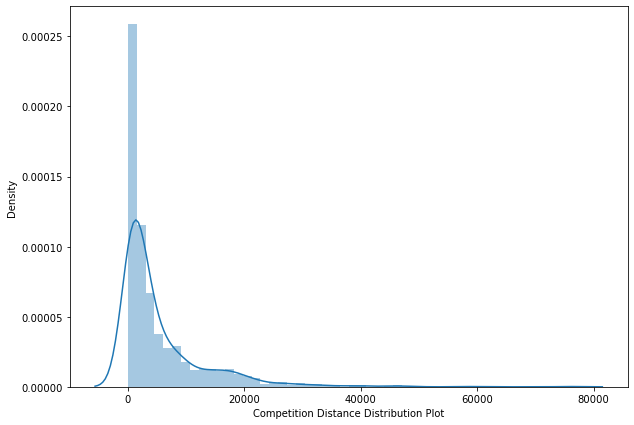

In [9]:
plt.figure(figsize = (10,7))
sns.distplot(x=stores_df['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')
plt.show()

It seems like the data for competetion distance is right skewed. Therefore inputting median is the right choice

In [10]:
# filling competition distance with the median value
stores_df['CompetitionDistance'].fillna(stores_df['CompetitionDistance'].median(), inplace = True)

In [11]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
stores_df['CompetitionOpenSinceMonth'].fillna(stores_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
stores_df['CompetitionOpenSinceYear'].fillna(stores_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)
     

In [12]:
# imputing the nan values of promo2 related columns with 0
stores_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
stores_df['Promo2SinceYear'].fillna(value=0,inplace=True)
stores_df['PromoInterval'].fillna(value=0,inplace=True)
     

In [13]:
#check
stores_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

## It look's like our store data is set for now lets merge it with train and test

In [14]:
train_df = train_df.merge(right=stores_df, on="Store", how="left")

In [15]:
test_df = test_df.merge(right=stores_df, on="Store", how="left")

In [16]:
train_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1111,2,01/01/2013,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,01/01/2013,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,01/01/2013,0,0,0,0,a,1,a,c,9260.0,9.0,2013.0,0,0.0,0.0,0
1017207,1114,2,01/01/2013,0,0,0,0,a,1,a,c,870.0,9.0,2013.0,0,0.0,0.0,0
1017208,1115,2,01/01/2013,0,0,0,0,a,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [17]:
test_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,17/09/2015,NaN,NaN,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,3,4,17/09/2015,NaN,NaN,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,7,4,17/09/2015,NaN,NaN,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0
3,8,4,17/09/2015,NaN,NaN,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,0.0,0.0,0
4,9,4,17/09/2015,NaN,NaN,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,0.0,0.0,0


In [119]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

## Let's convet date column and extract different parts

In [19]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.weekofyear


In [20]:
# Now we will use that function to extract the date information from the merged_train_df
split_date(train_df)
# Also we will apply that function to extract the date information from the merged_test_df
split_date(test_df)

<ipython-input-19-96498babaedf>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-19-96498babaedf>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['WeekOfYear'] = df.Date.dt.weekofyear
<ipython-input-19-96498babaedf>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-19-96498babaedf>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['WeekOfYear'] = df.Date.dt.weekofyear


In [21]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,0.0,0.0,0,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,0.0,0.0,0,2015,7,31,31


PromoOpen
CompetetionOpen
Replaced negative values present in promopen and competition opn wit hzero

In [22]:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)


In [23]:
comp_months(train_df)
comp_months(test_df)

In [24]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,0.0,0.0,0,2015,7,31,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,0.0,0.0,0,2015,7,31,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,0.0,0.0,0,2015,7,31,31,3.0


In [25]:
train_df[['Date', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(10)

,Date,CompetitionDistance,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
272807,2014-11-23,820.0,2012.0,3.0,32.0
472257,2014-04-05,2260.0,2013.0,9.0,7.0
433176,2014-08-06,2370.0,2013.0,9.0,11.0
922486,2013-03-26,450.0,2014.0,4.0,0.0
366981,2014-08-14,25430.0,1999.0,5.0,183.0
849183,2013-05-31,2280.0,2013.0,9.0,0.0
268860,2014-11-27,6320.0,2013.0,9.0,14.0
395251,2014-07-15,3740.0,2002.0,2.0,149.0
856153,2013-05-25,1600.0,2006.0,6.0,83.0
47477,2015-06-19,2130.0,2008.0,12.0,78.0


In [26]:
def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']

In [27]:
promo_cols(train_df)
promo_cols(test_df)

In [28]:
train_df[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval', 'Promo2Open']].sample(10)

,Date,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval,Promo2Open
194914,2015-07-02,0,0.0,0.0,0,0.000000
588913,2014-01-20,1,2011.0,14.0,"Jan,Apr,Jul,Oct",33.704918
486590,2014-04-21,1,2013.0,36.0,"Mar,Jun,Sept,Dec",7.639344
45479,2015-06-21,0,0.0,0.0,0,0.000000
469942,2014-06-05,1,2010.0,13.0,"Jan,Apr,Jul,Oct",50.295082
880857,2013-03-05,0,0.0,0.0,0,0.000000
135587,2015-01-04,1,2013.0,5.0,"Feb,May,Aug,Nov",23.081967
994059,2013-01-21,1,2015.0,14.0,"Jan,Apr,Jul,Oct",0.000000
829570,2013-06-18,0,0.0,0.0,0,0.000000
210922,2015-01-23,1,2011.0,18.0,"Feb,May,Aug,Nov",44.786885


## EDA

<AxesSubplot:title={'center':'Sales Boxplot'}>

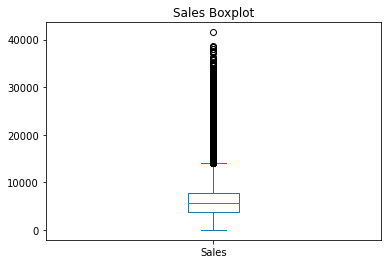

In [29]:
train_df.Sales.plot.box(title = "Sales Boxplot")

<AxesSubplot:title={'center':'Sales Boxplot'}>

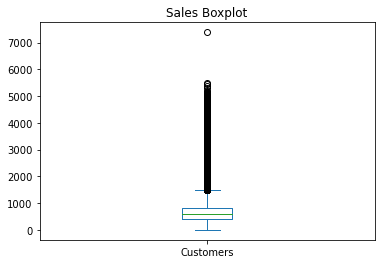

In [30]:
train_df.Customers.plot.box(title = "Sales Boxplot")

Let's check distributino of sales

/Users/samituttarkar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


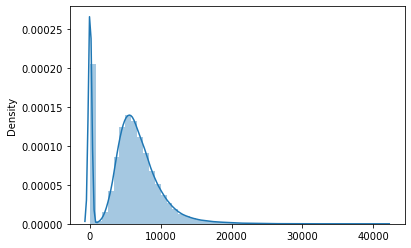

In [31]:
sns.distplot(x=train_df['Sales'])
plt.show()

Let's check how store type and Customers are realted to sales 

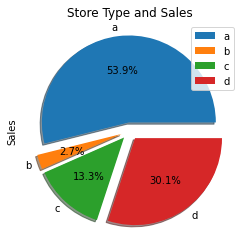

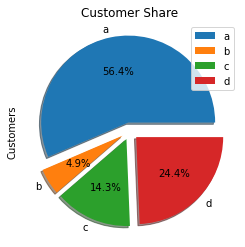

In [32]:
#let's explore store type a bit and it's influence on sales
train_df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True, explode = [0.1, 0.1, 0.1,0.1])
plt.show()
#customers and store type
train_df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True, explode = [0.1, 0.1, 0.1,0.1])
plt.show()

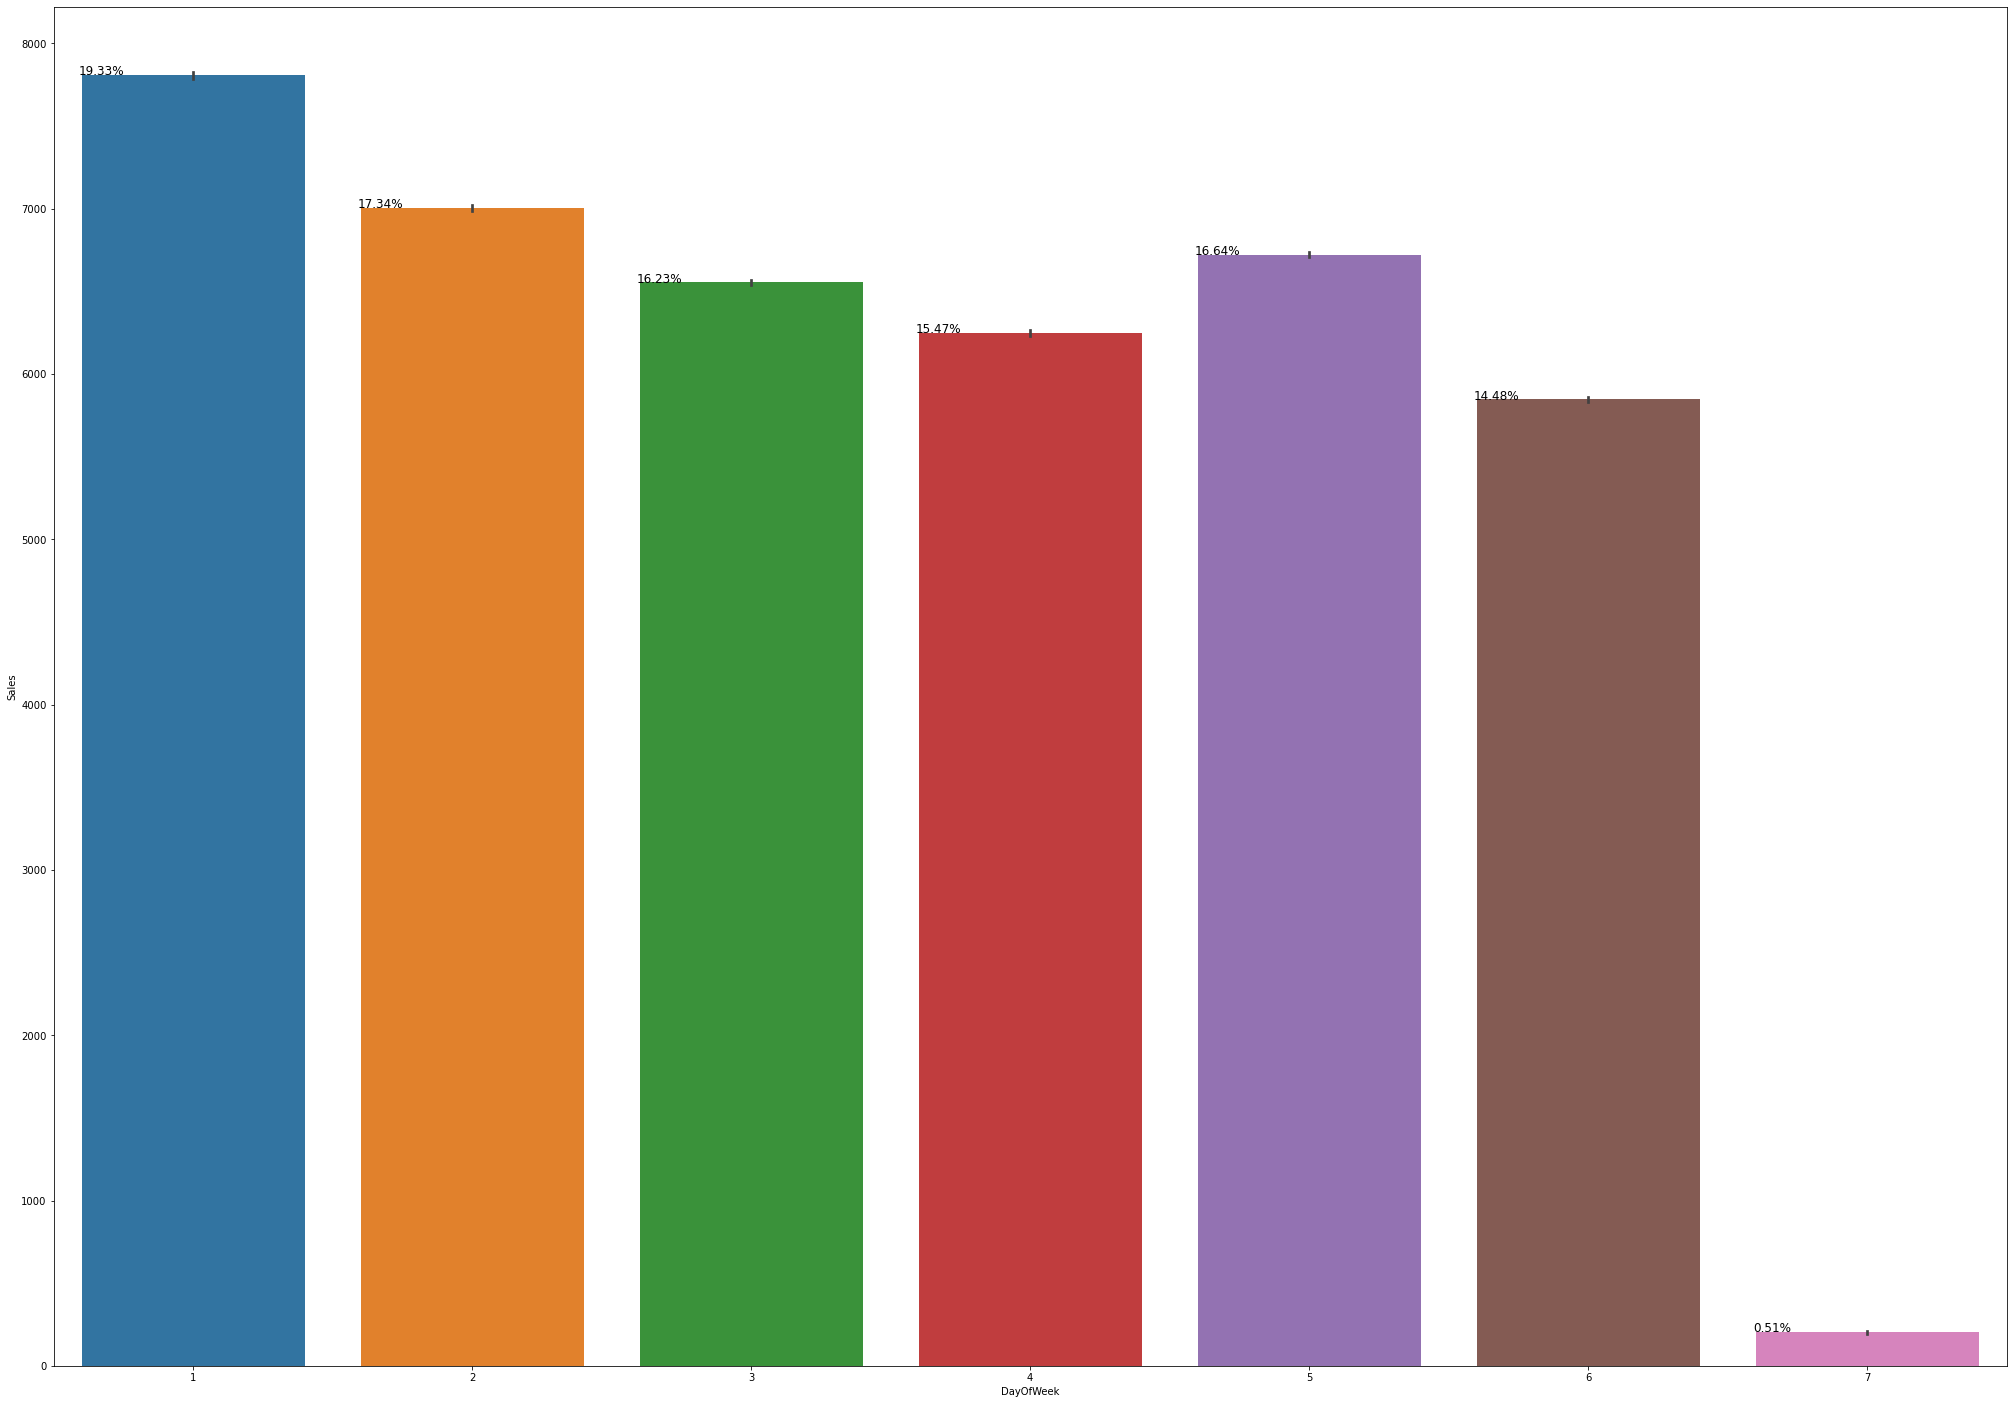

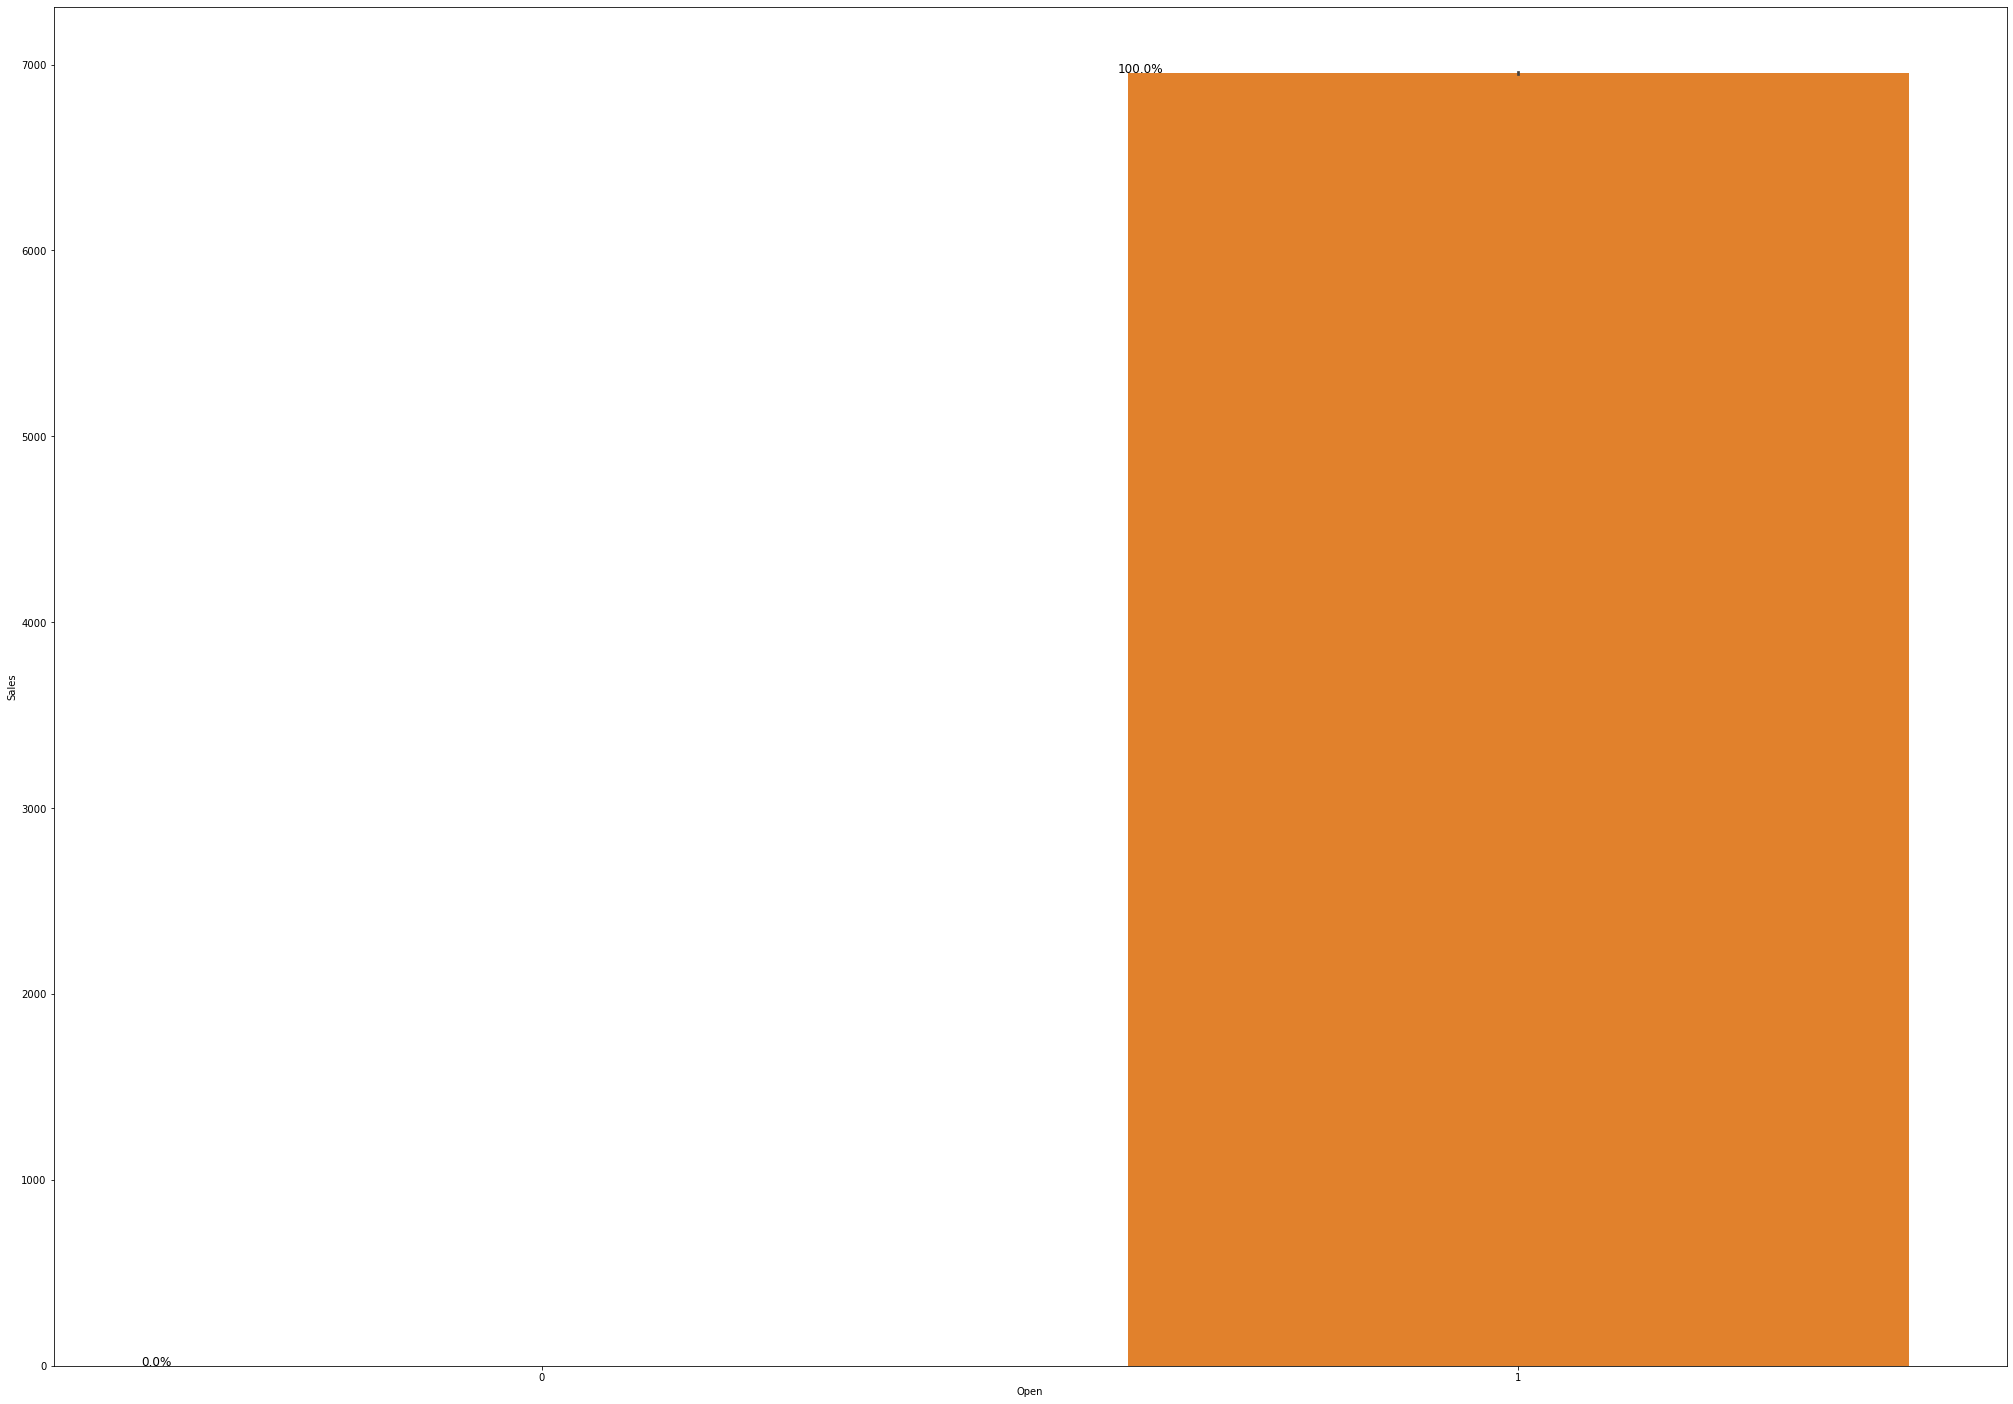

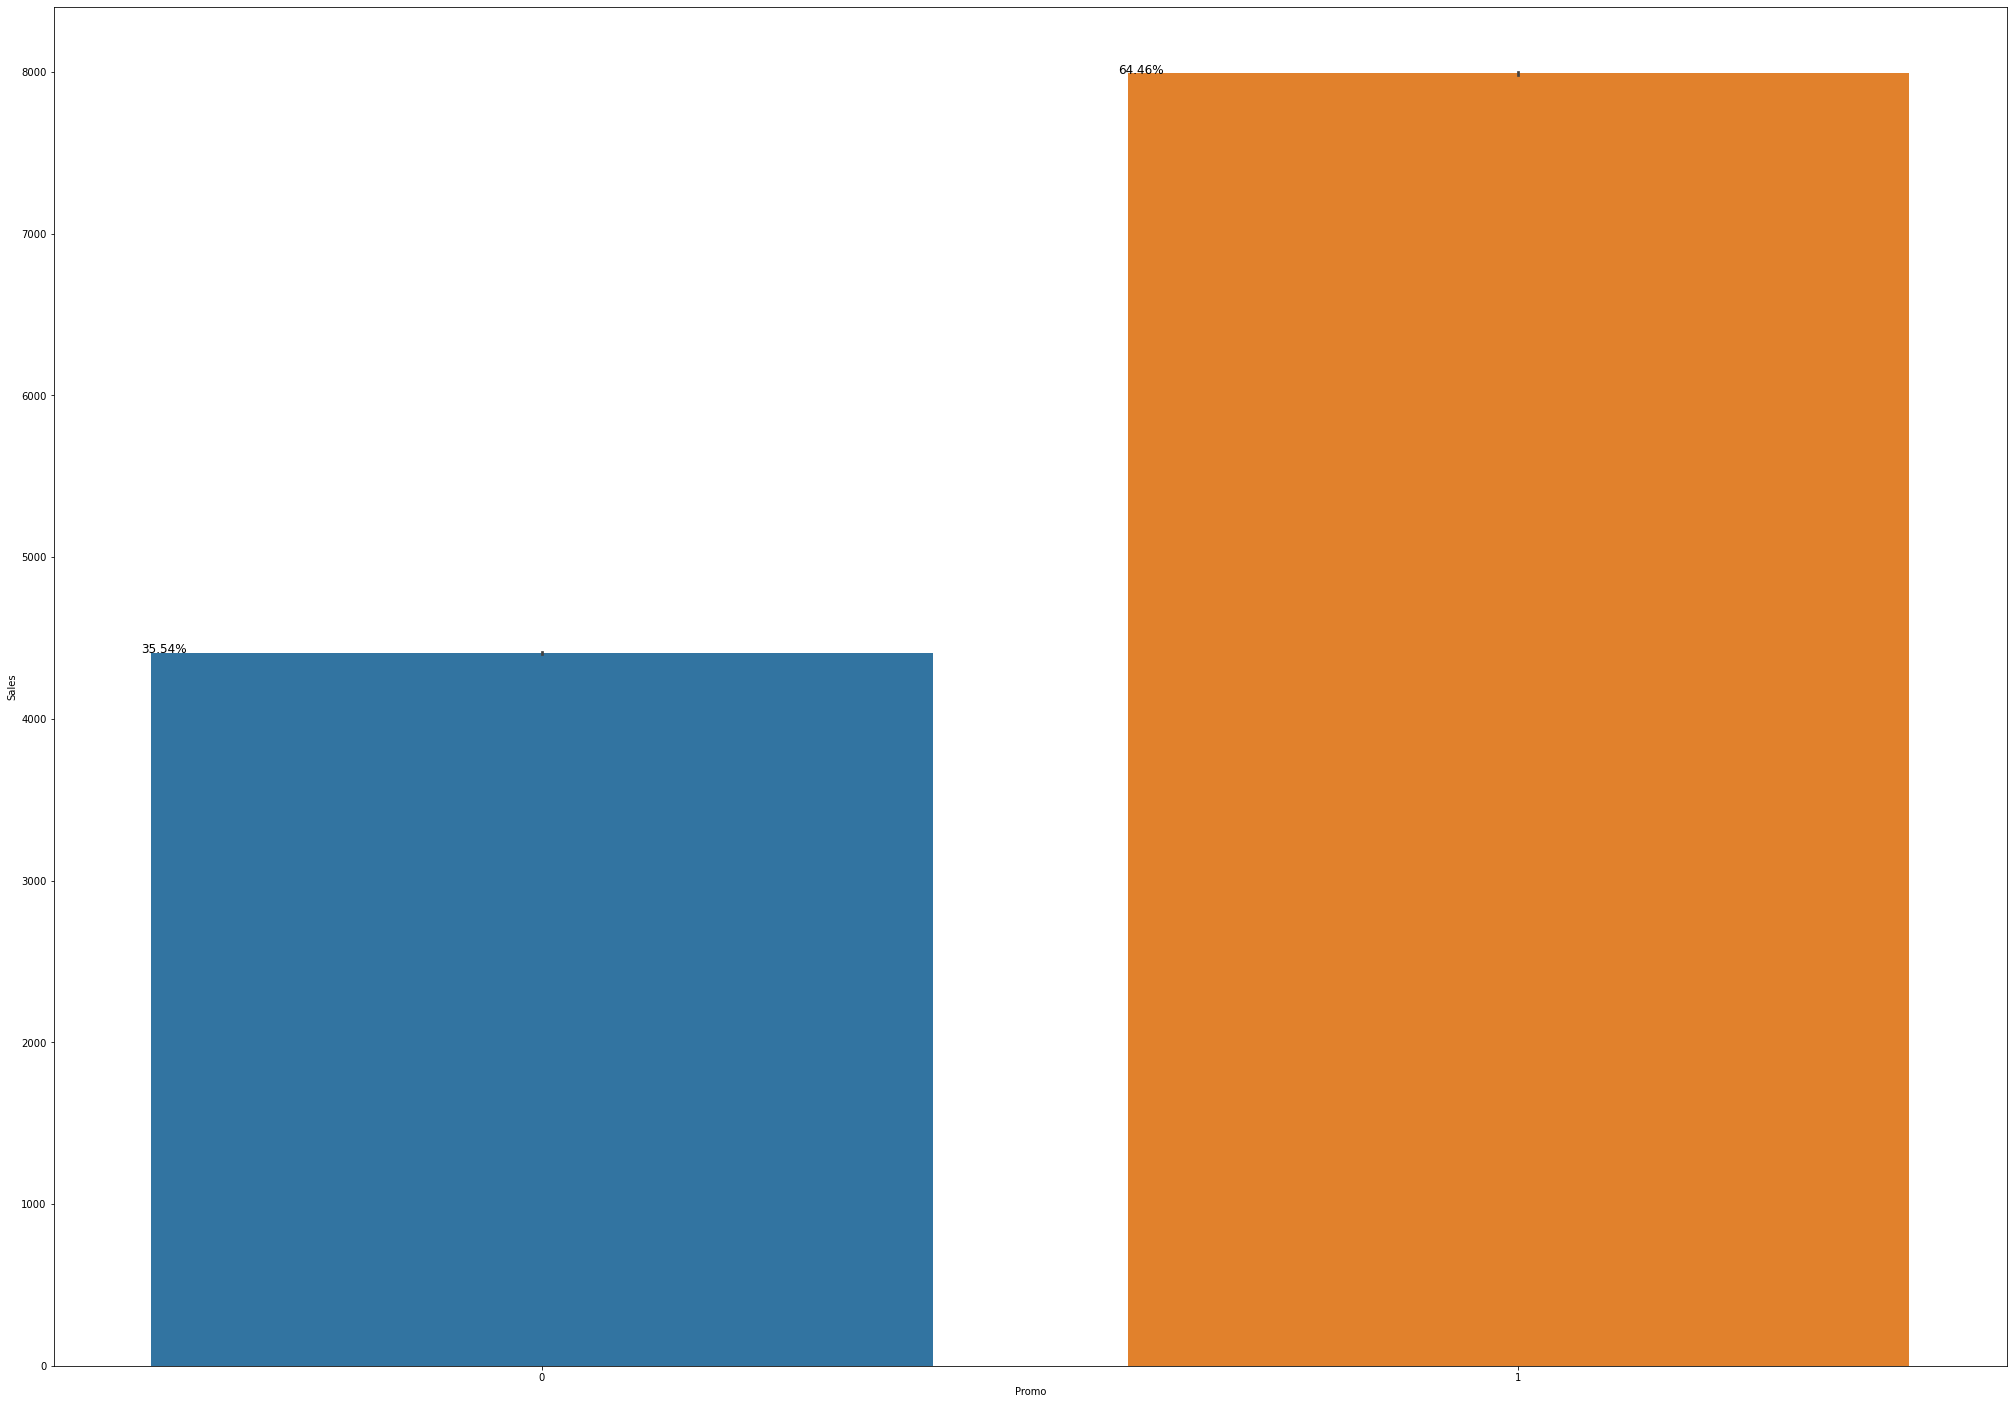

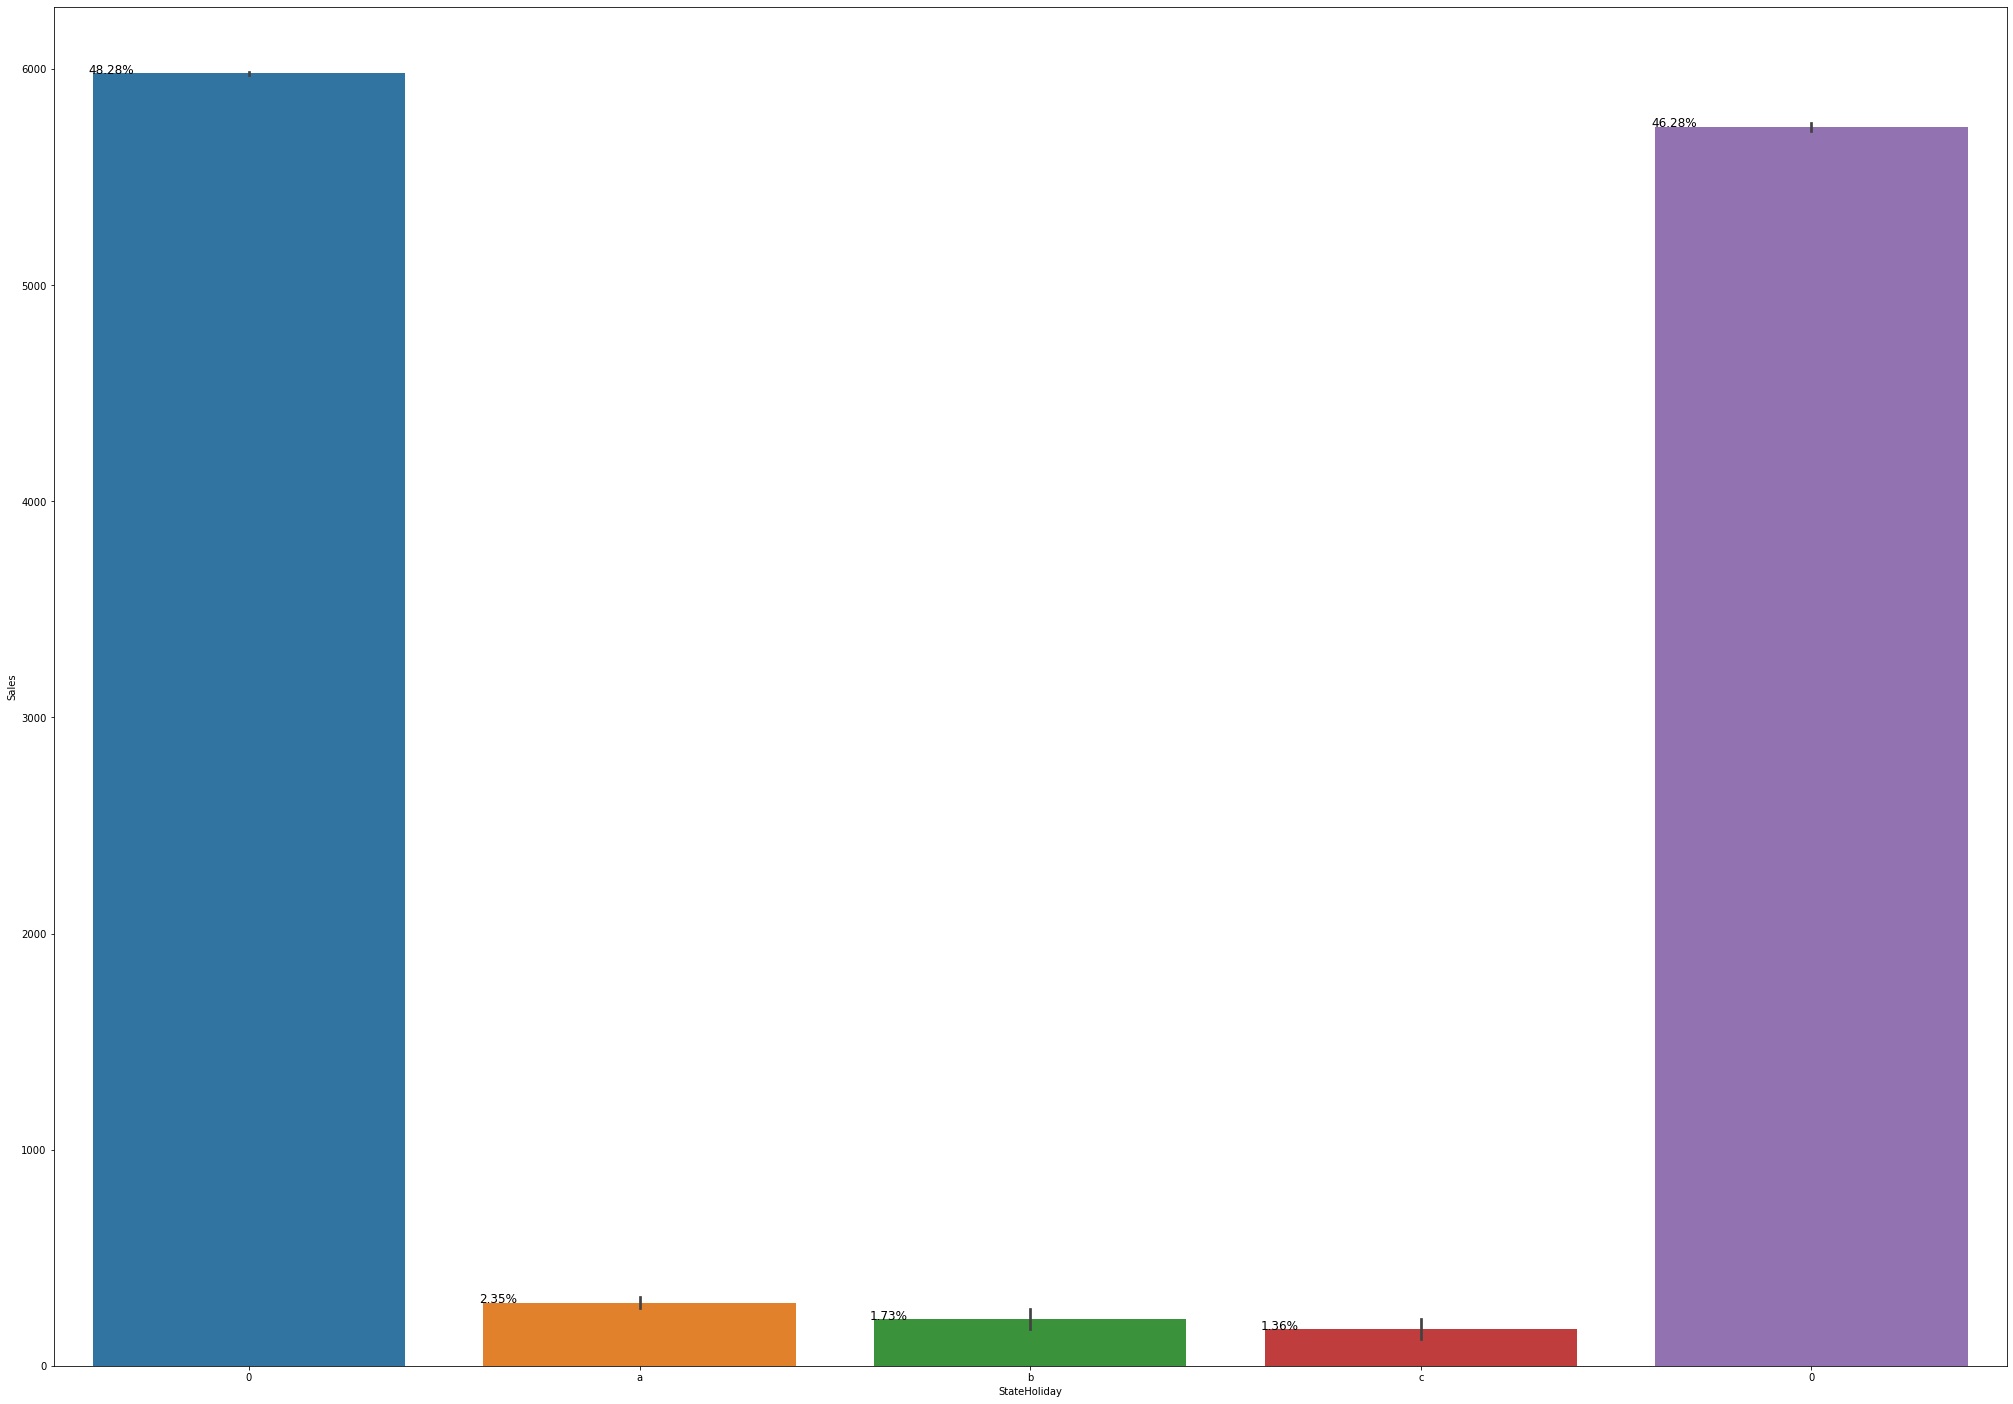

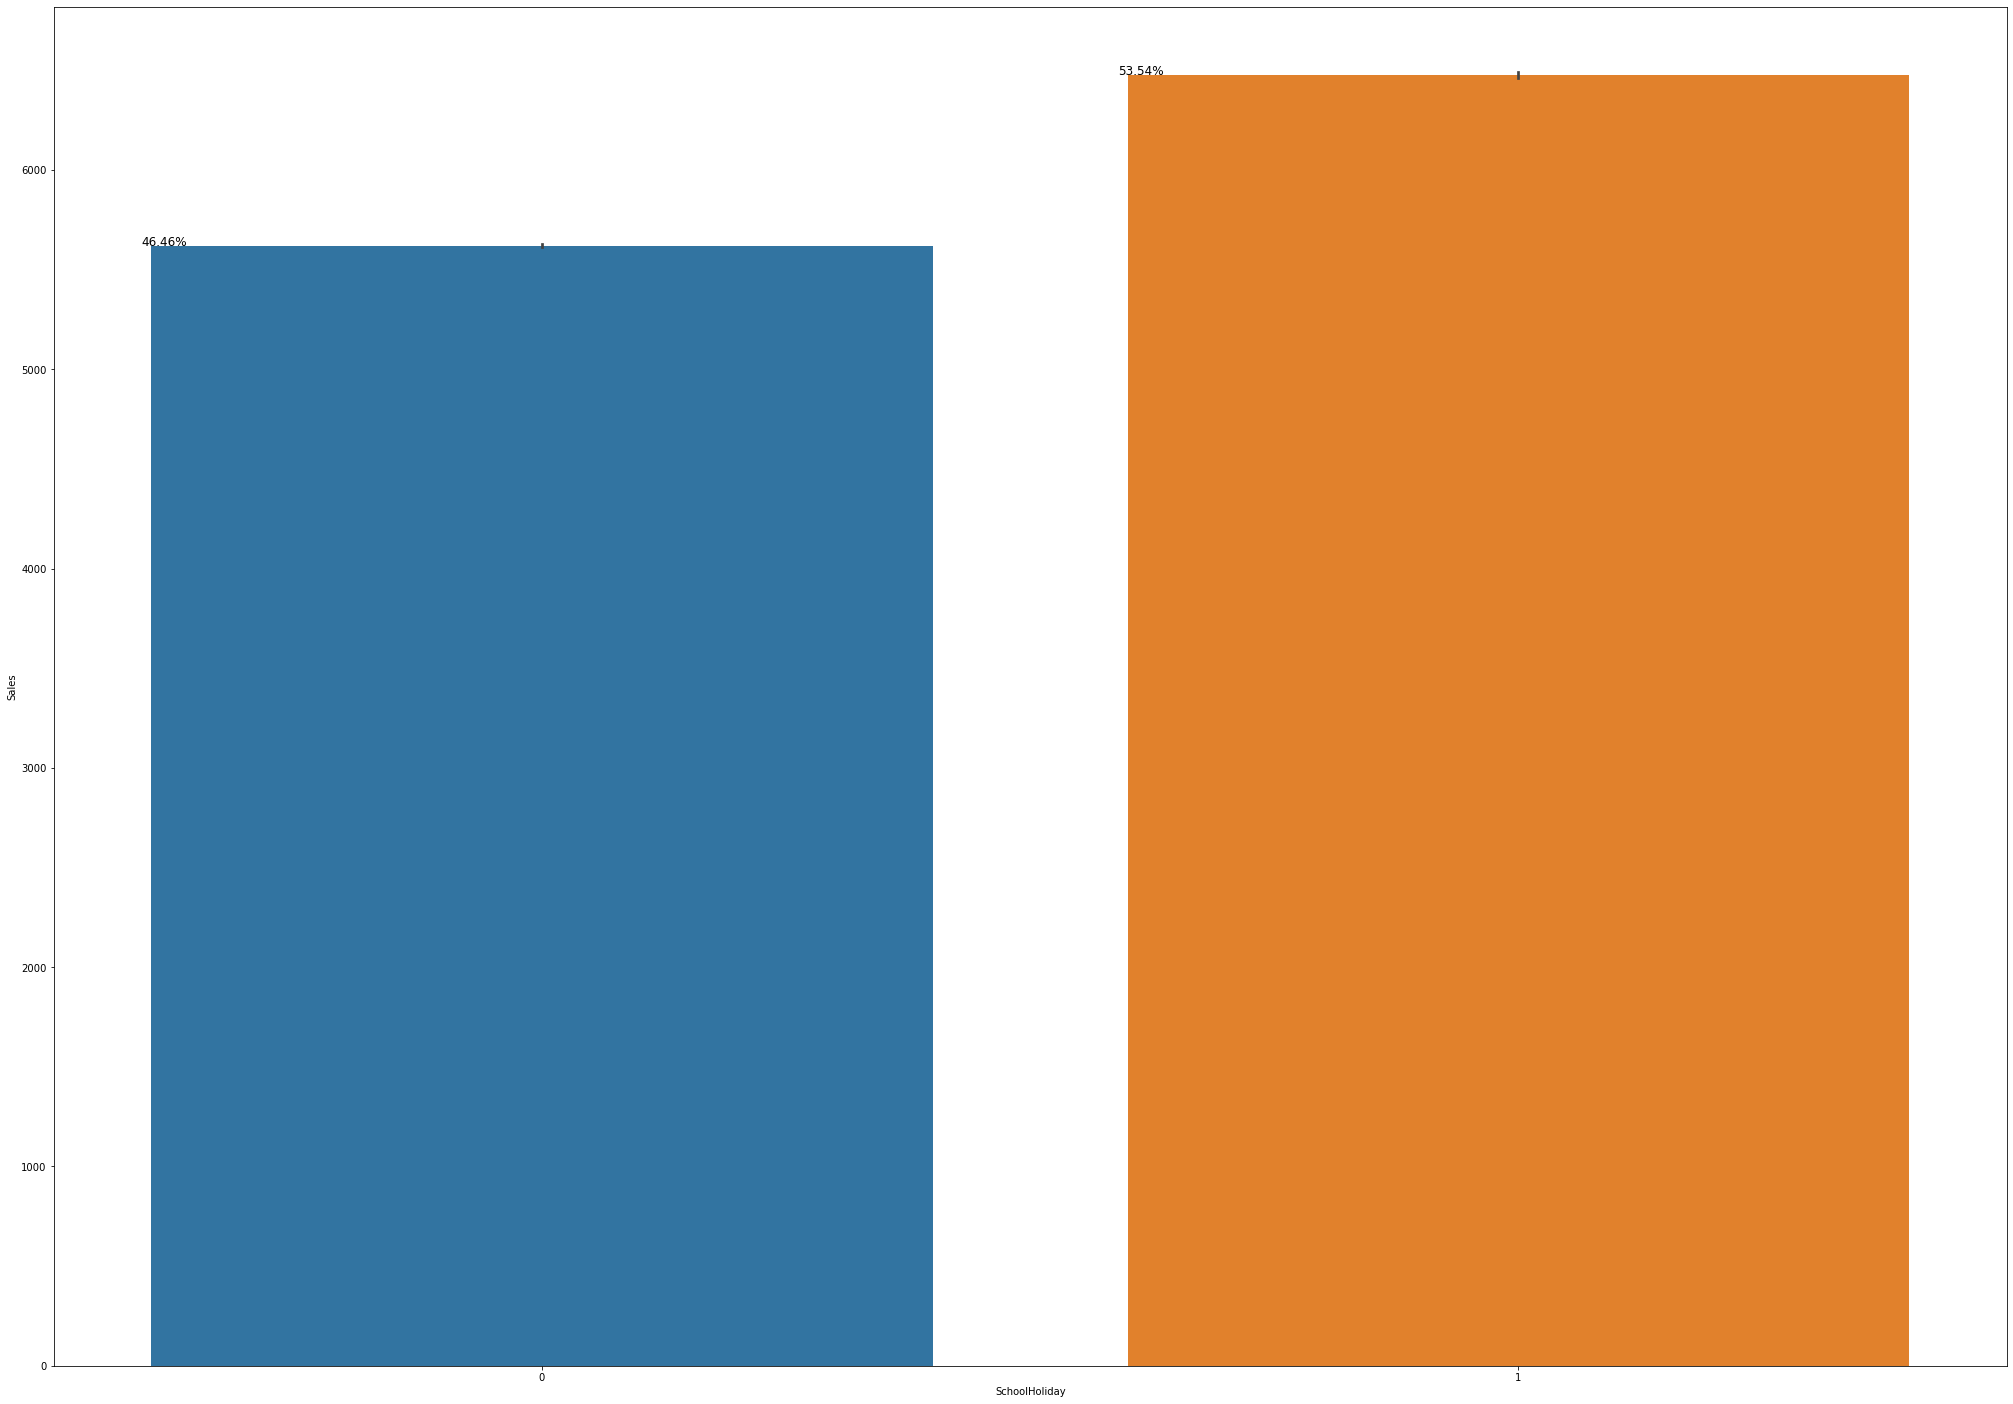

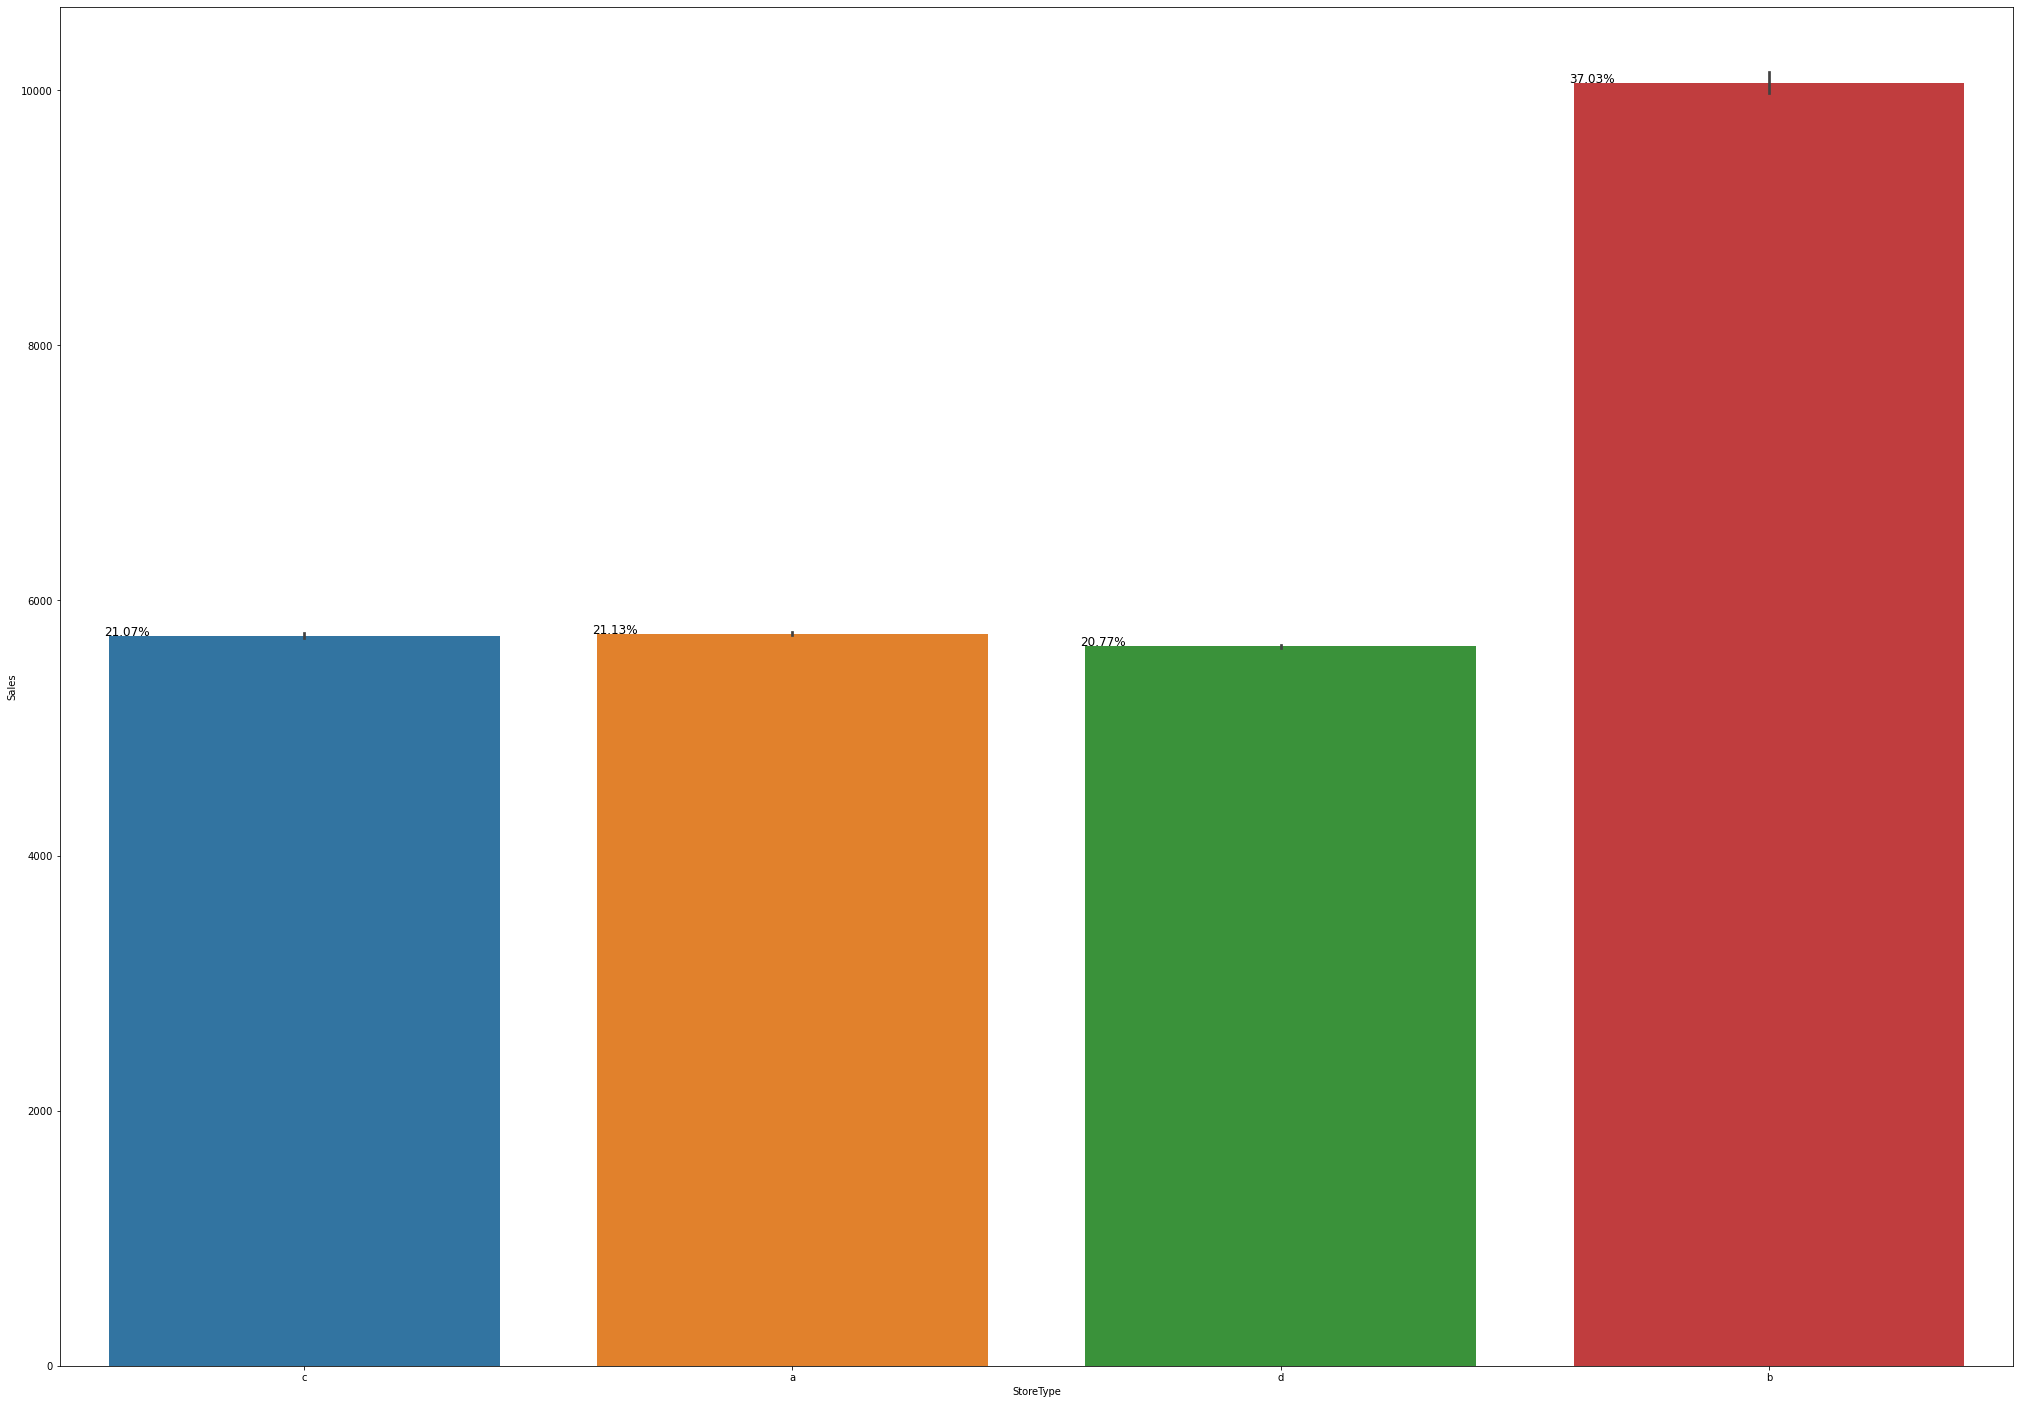

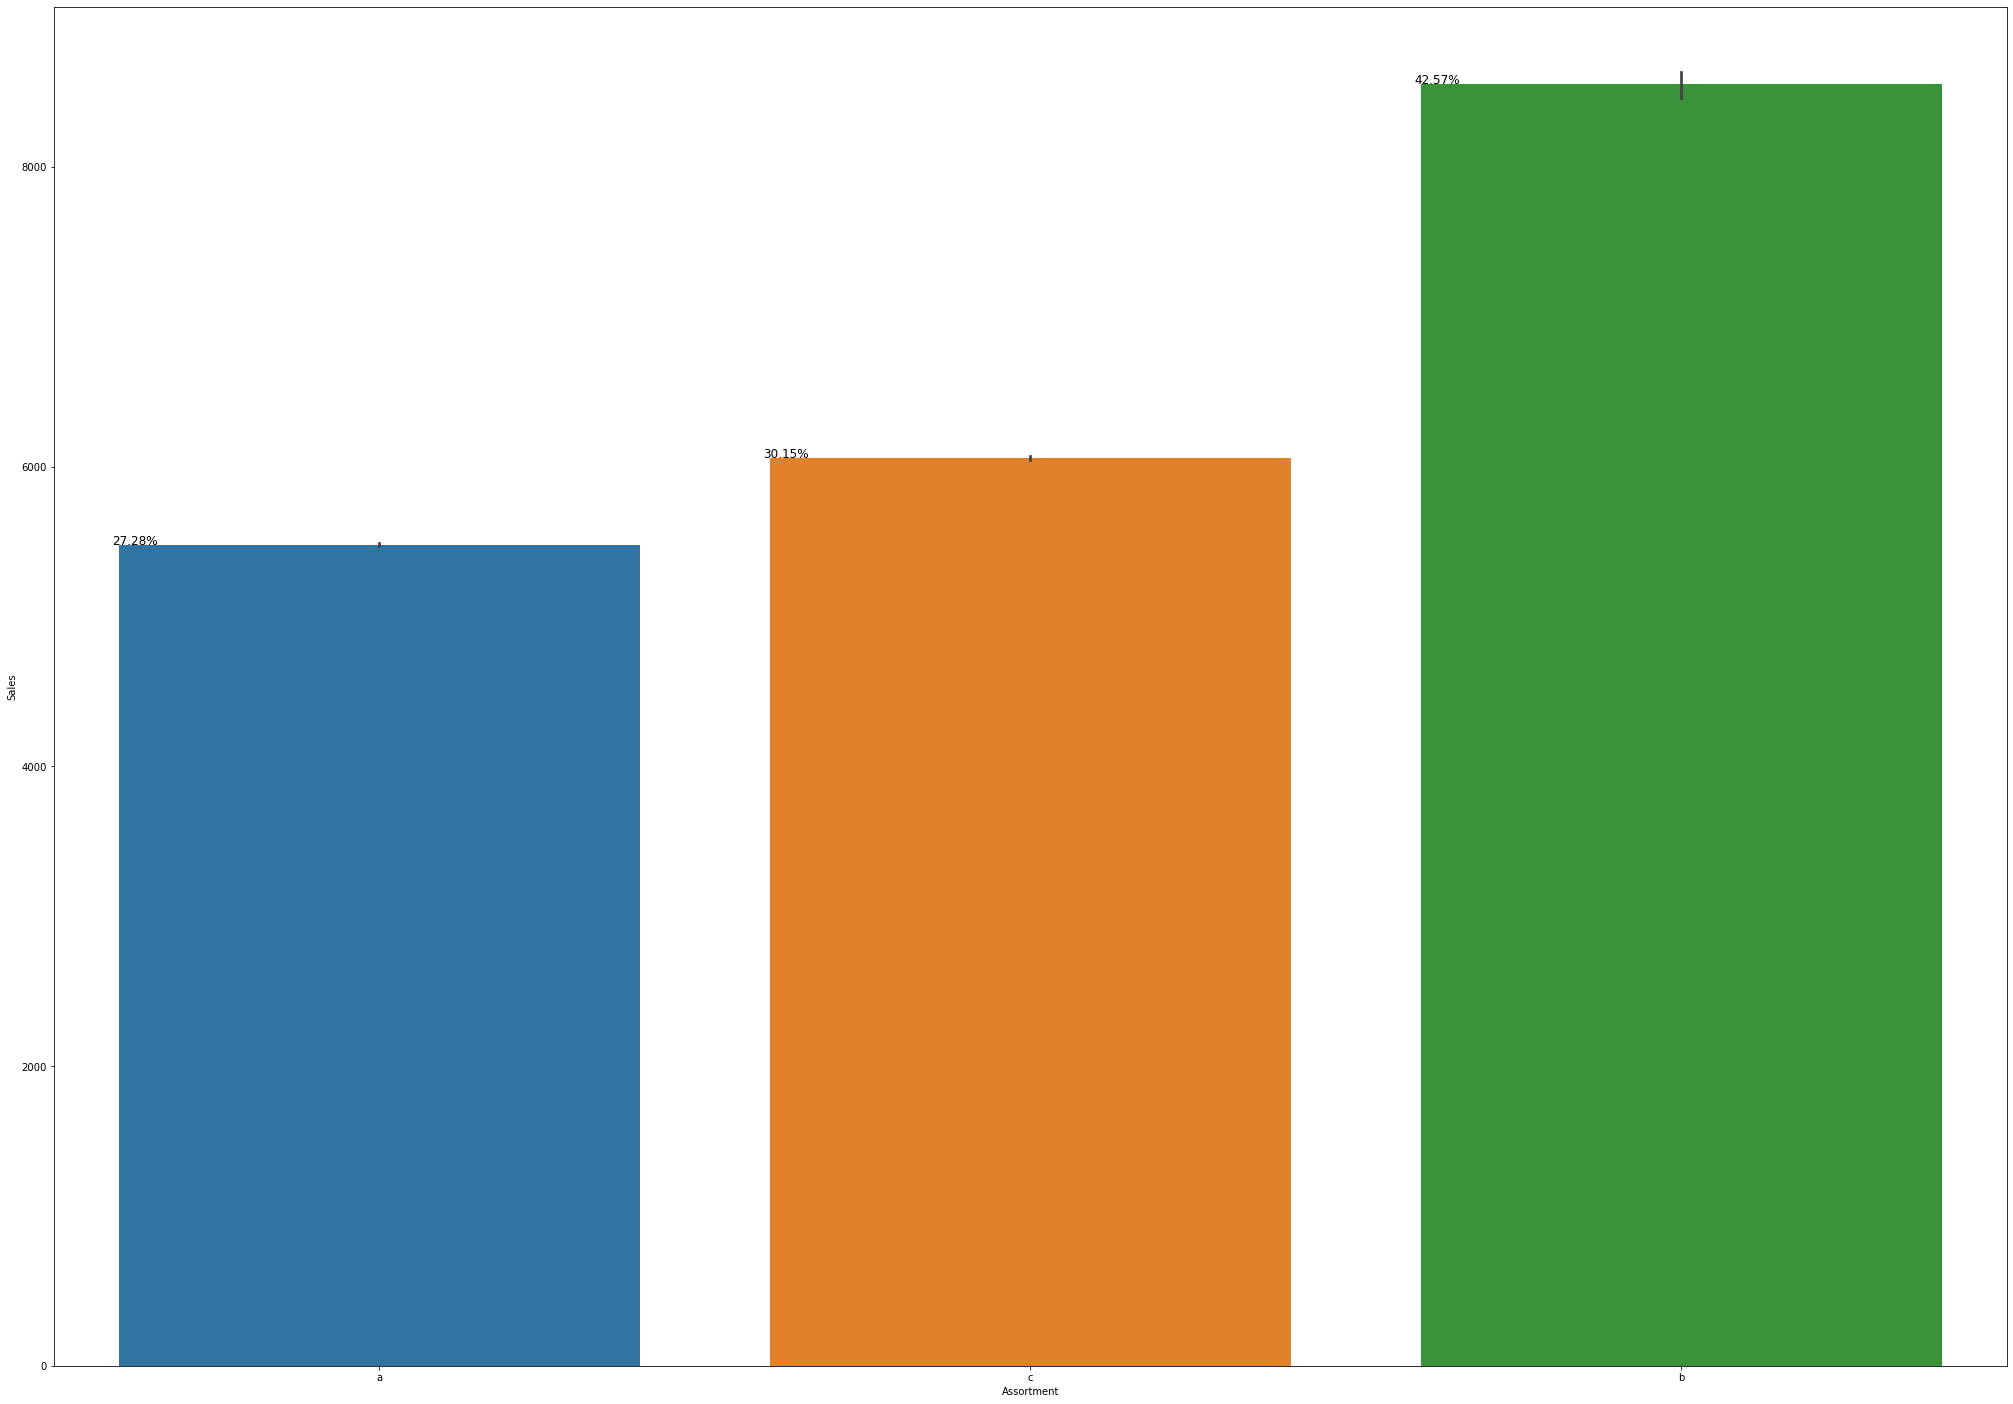

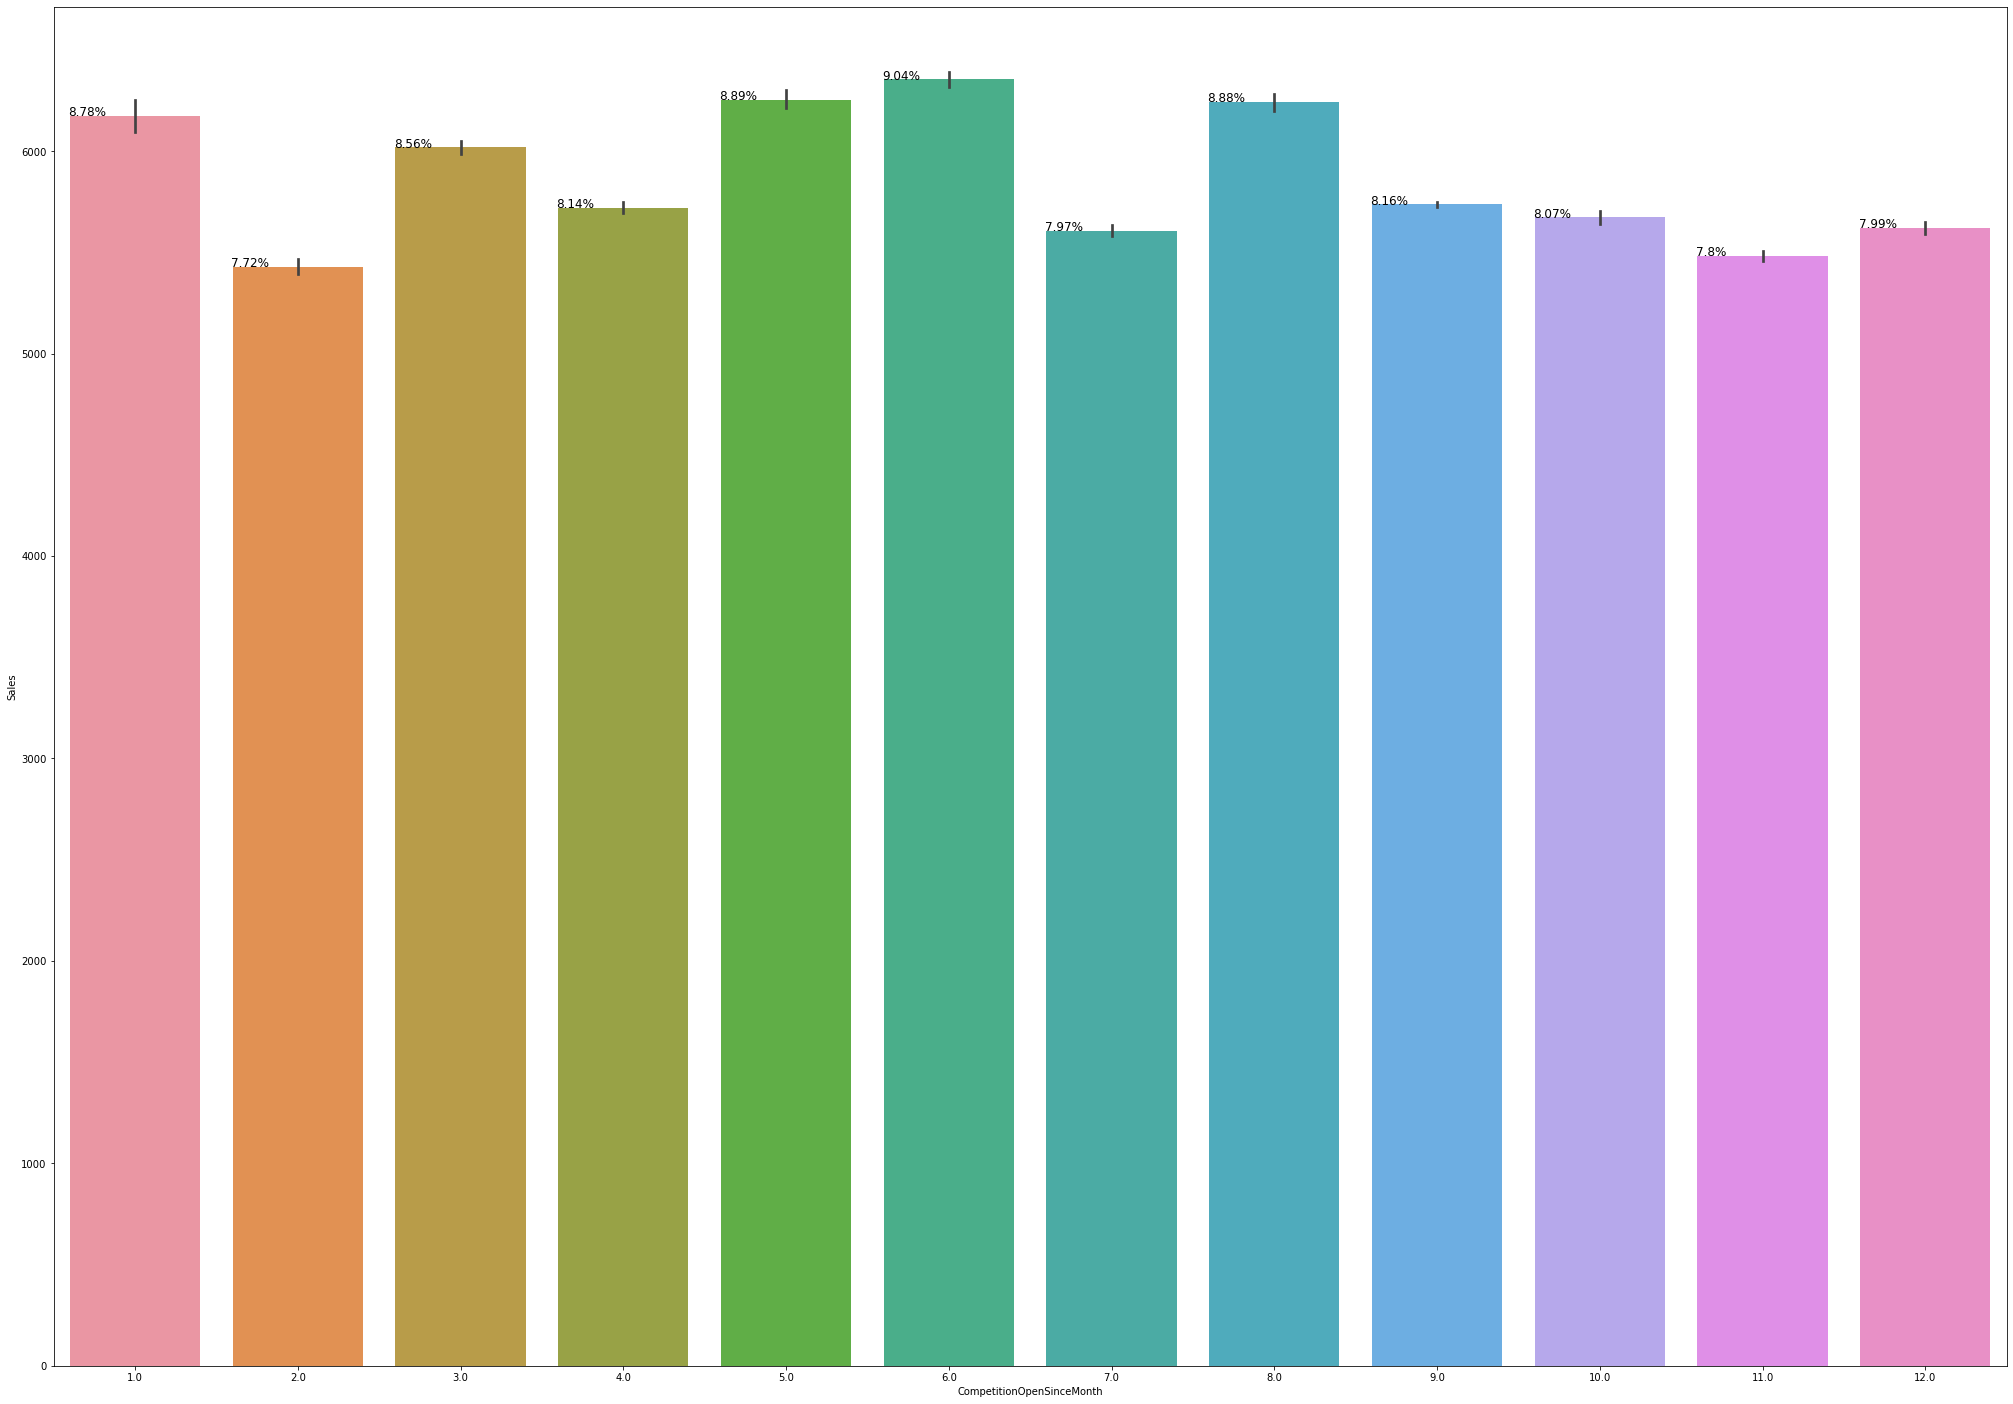

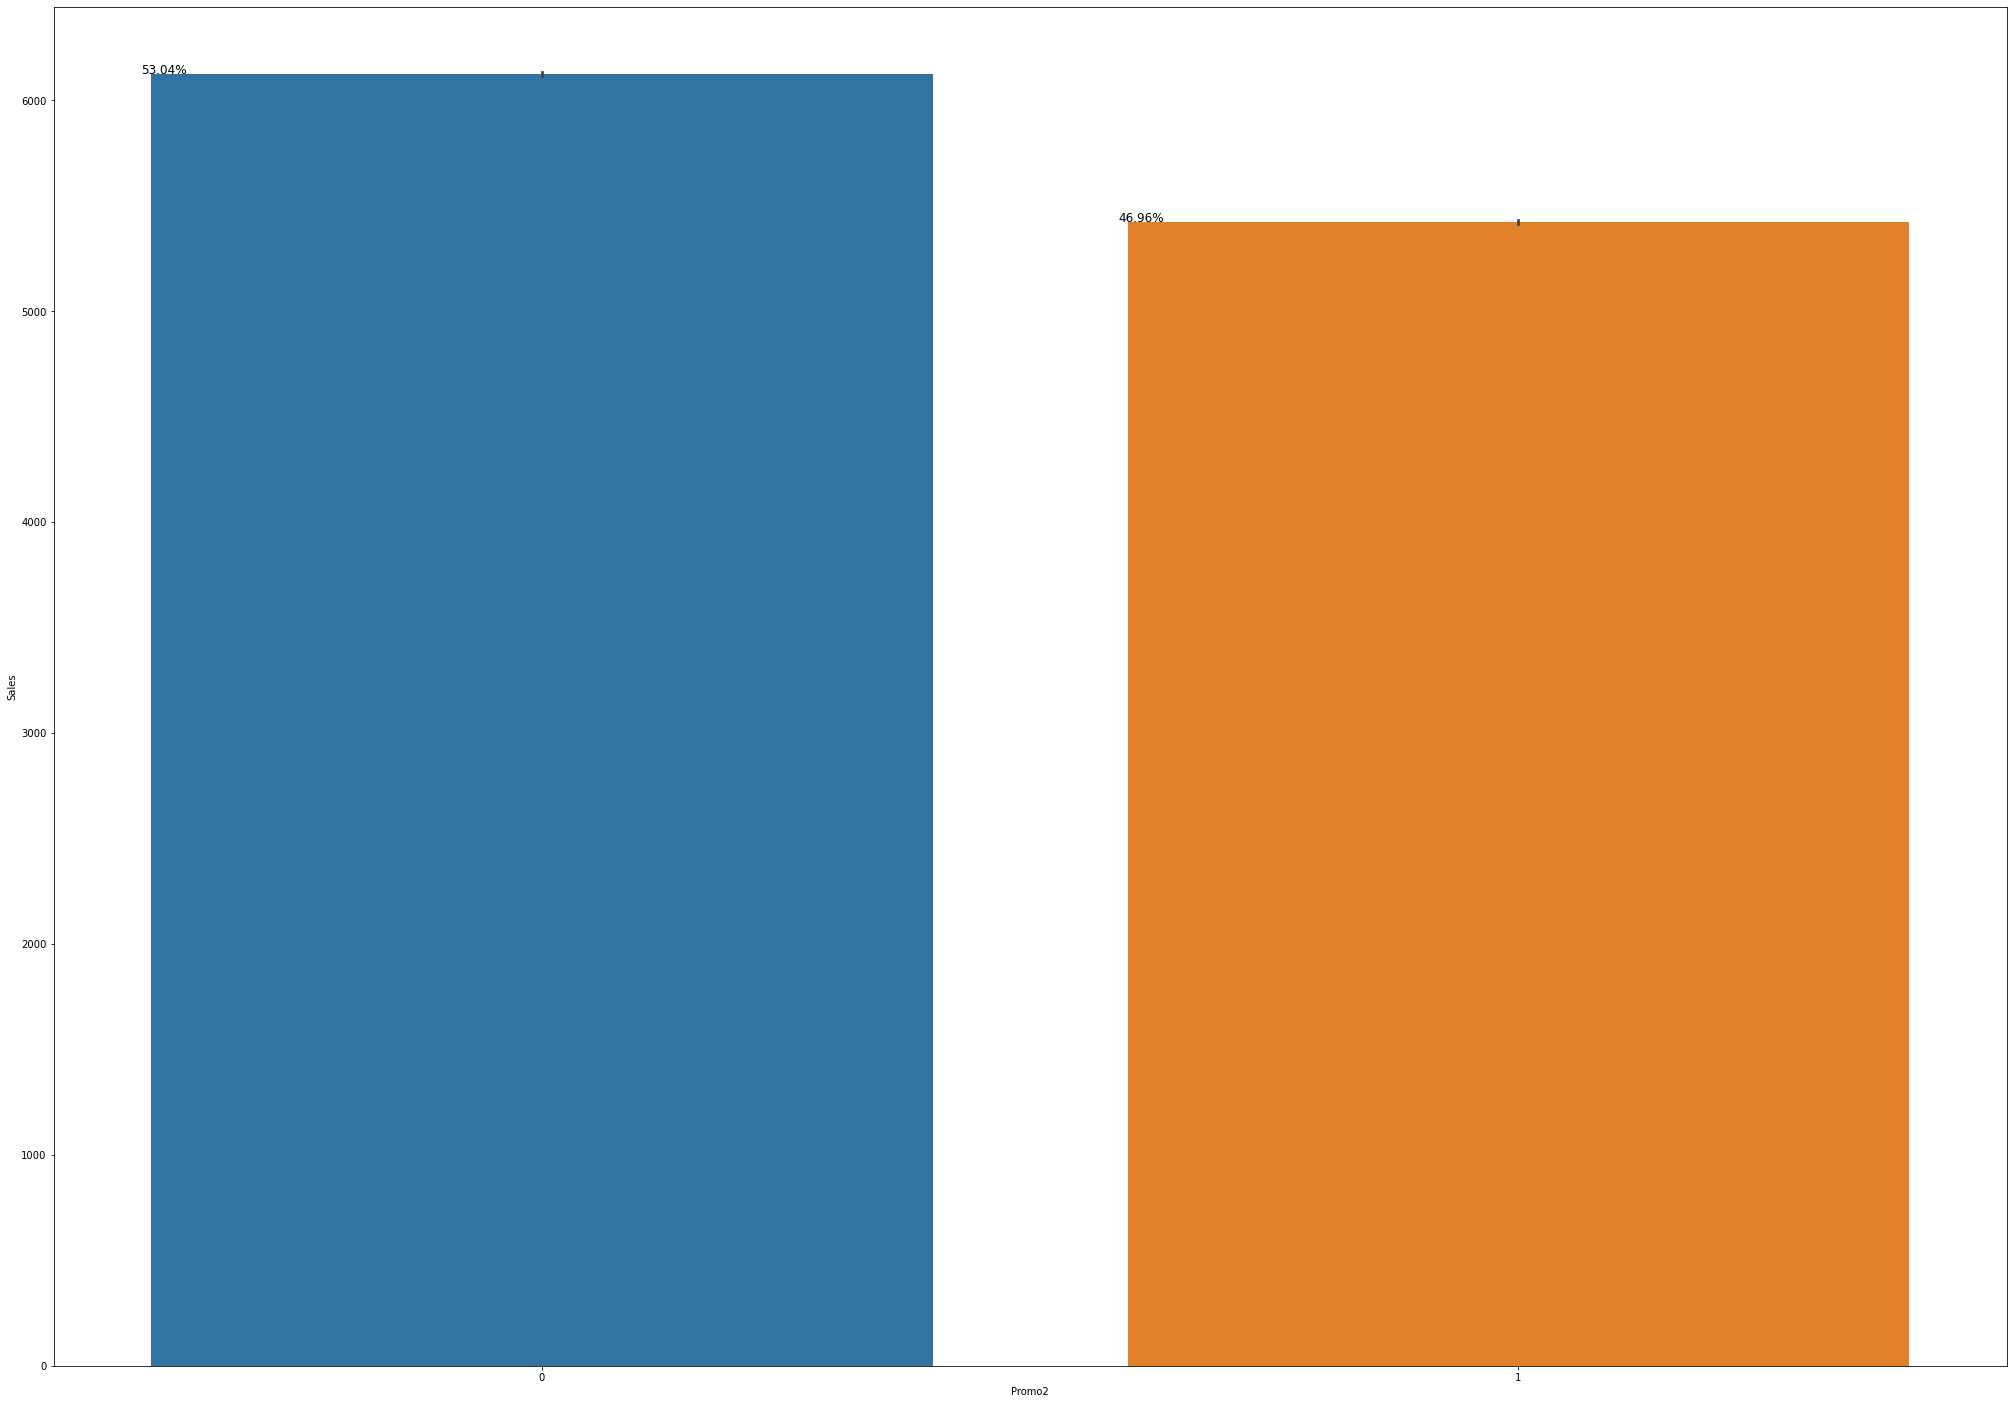

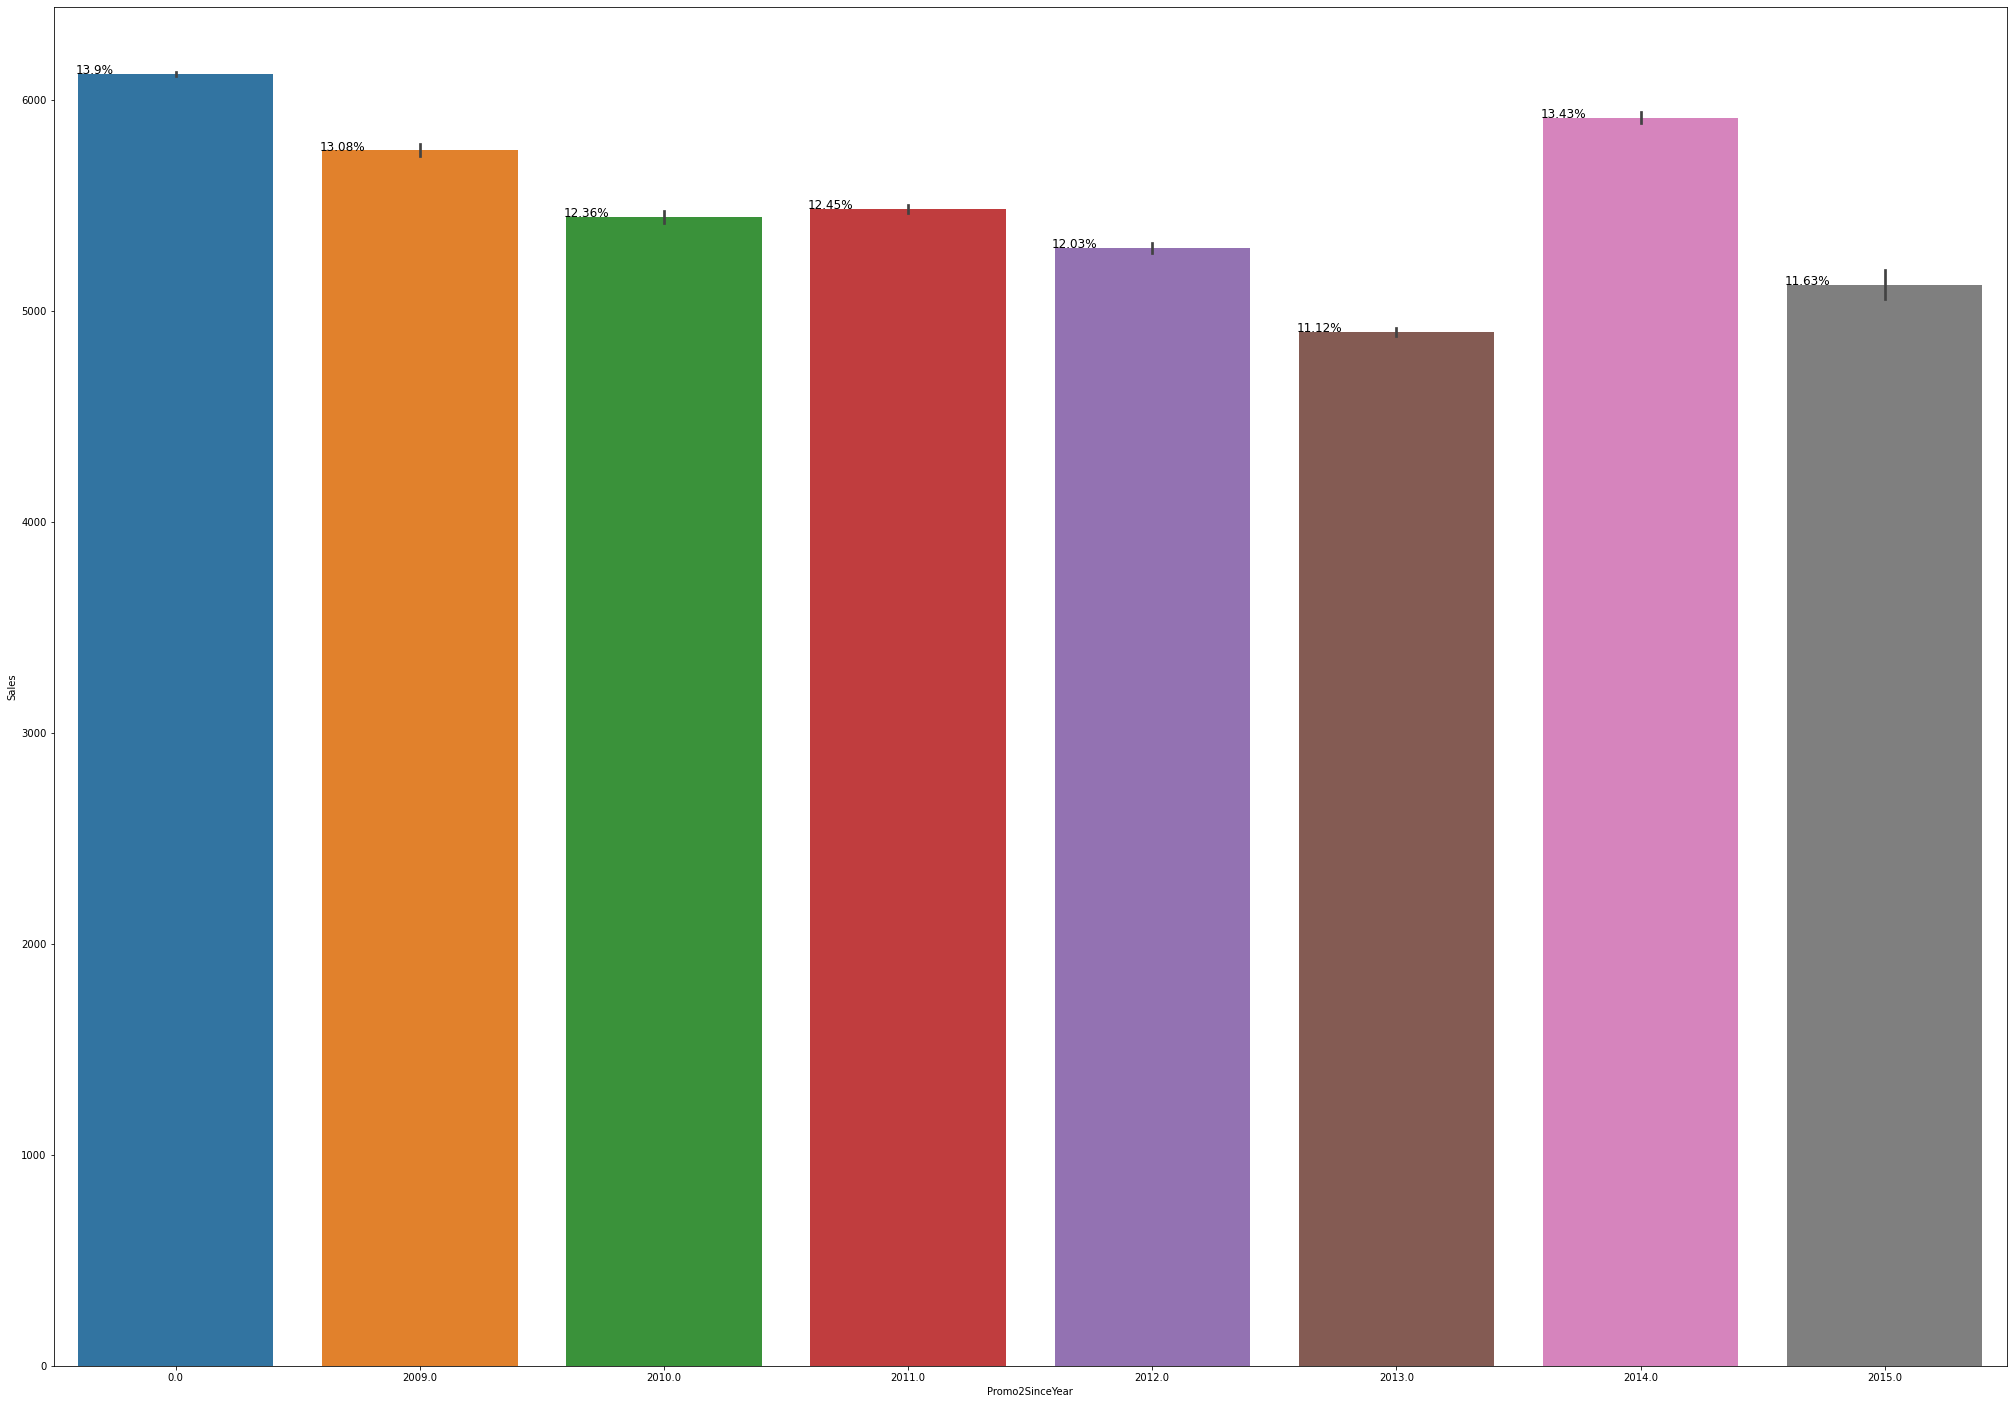

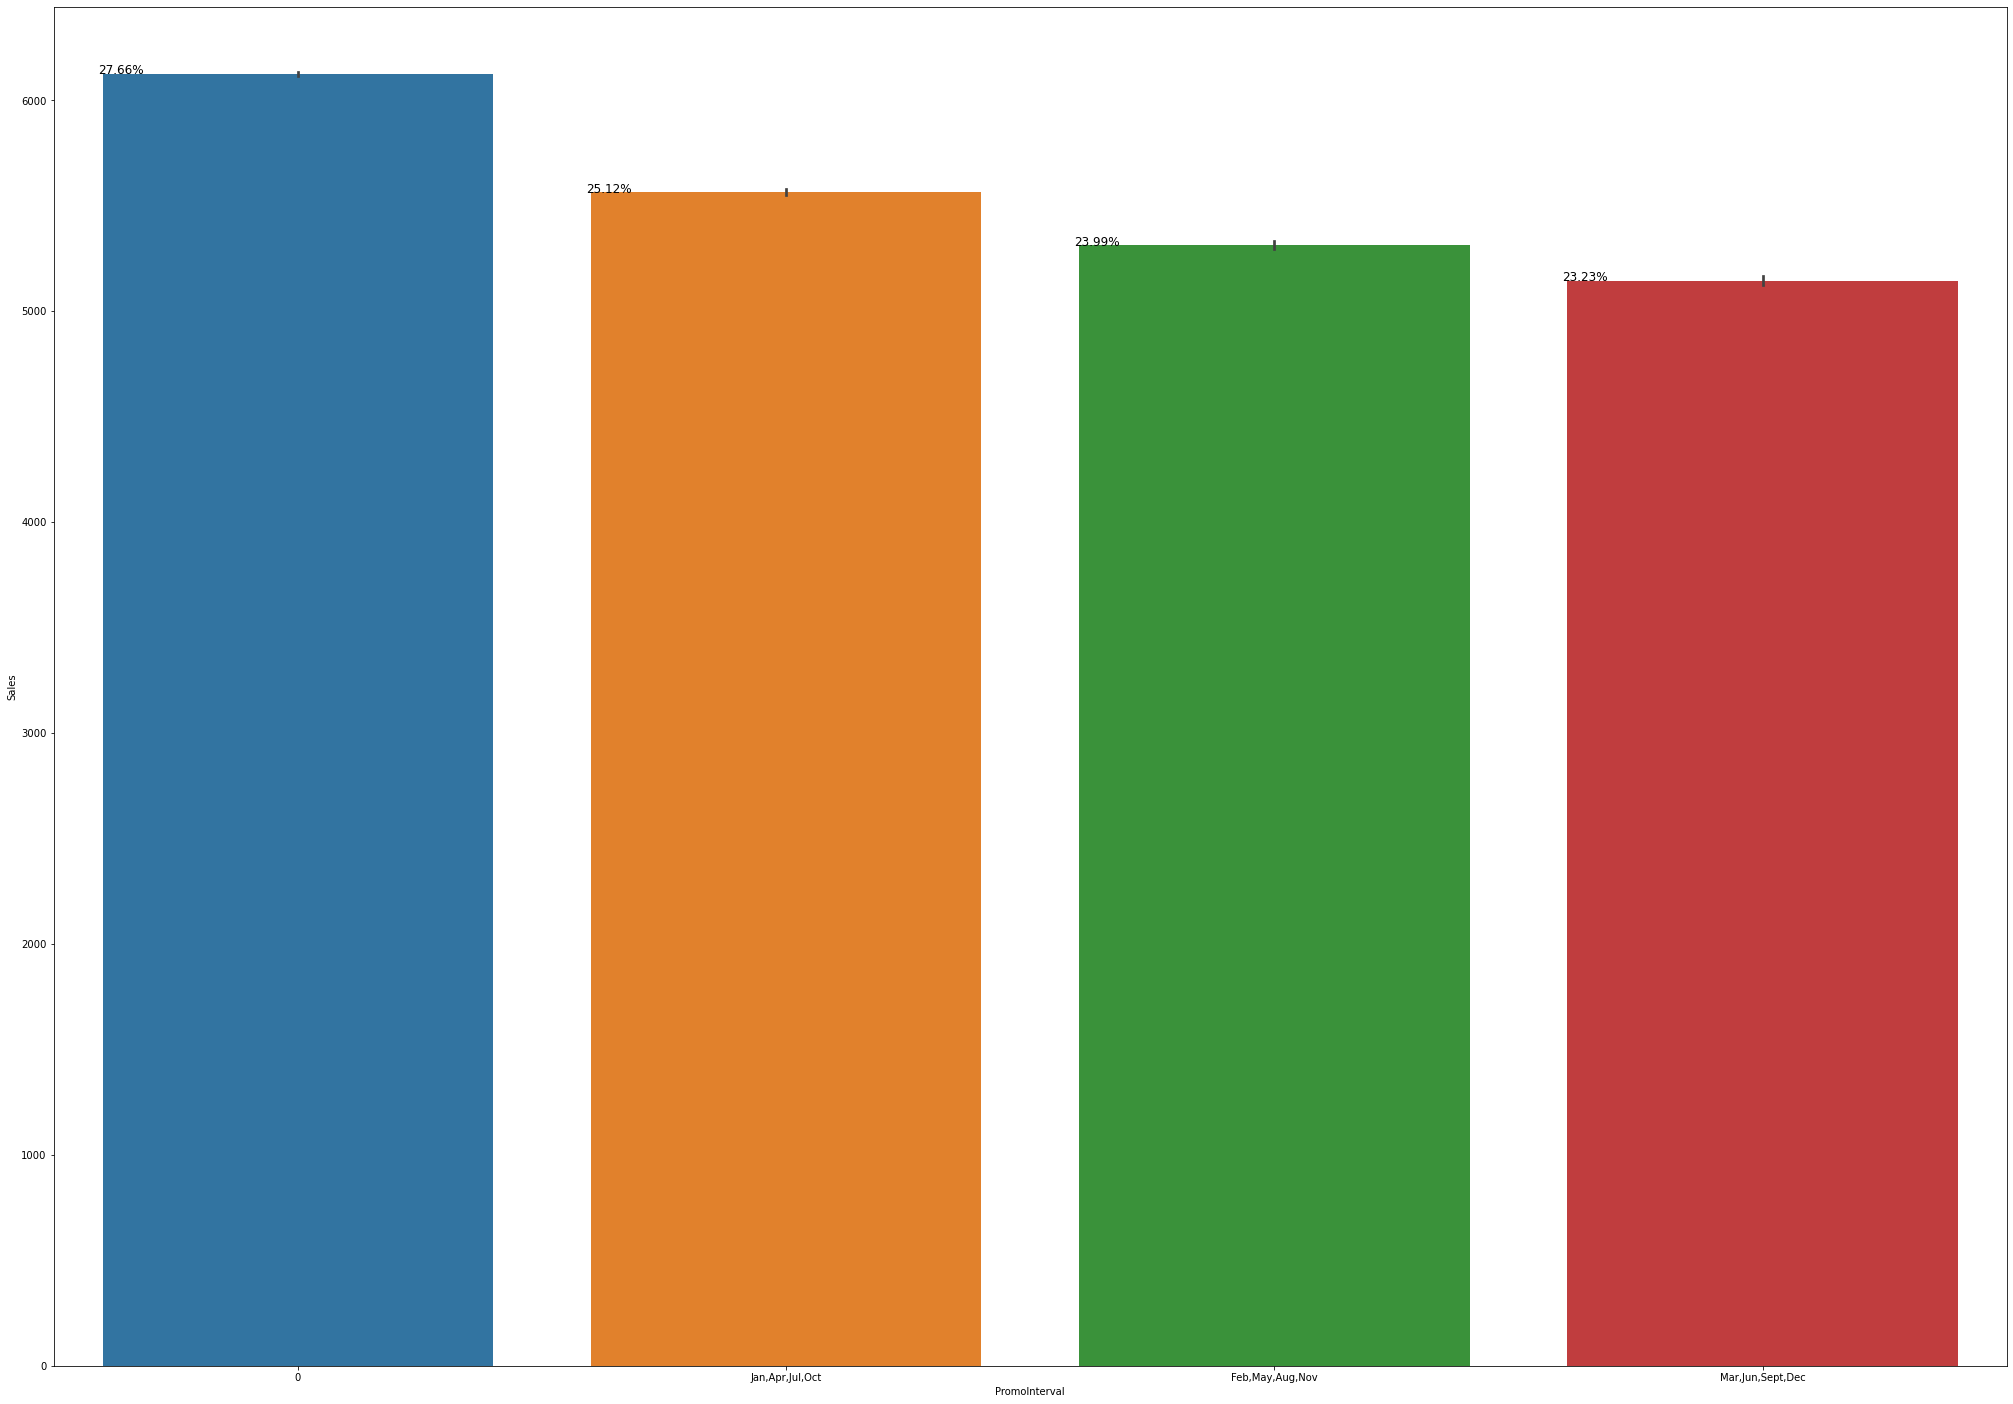

In [123]:
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
    
    ax = sns.barplot(x=train_df[value], y=train_df['Sales']) 
    totals = []
    for i in ax.patches: #for every patch in the barplot ax
        totals.append(i.get_height()) #append height for each patch

    total = sum(totals) #sum of each patch height for a plot

    for i in ax.patches:  
        ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
    plt.show()

<AxesSubplot:xlabel='StoreType', ylabel='Sales'>

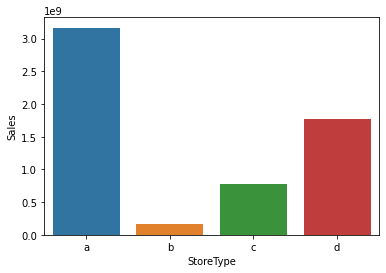

In [34]:
sales_by_store = train_df.groupby('StoreType')['Sales'].sum()
sales_by_store = sales_by_store.reset_index()
sns.barplot(data = sales_by_store, x = 'StoreType', y = 'Sales')

In [35]:
sales_stype = train_df.groupby('StoreType')['Sales'].mean()
sales_stype =sales_stype.reset_index()
sales_cust = train_df.groupby('StoreType')['Customers'].mean()
sales_cust = sales_cust.reset_index()

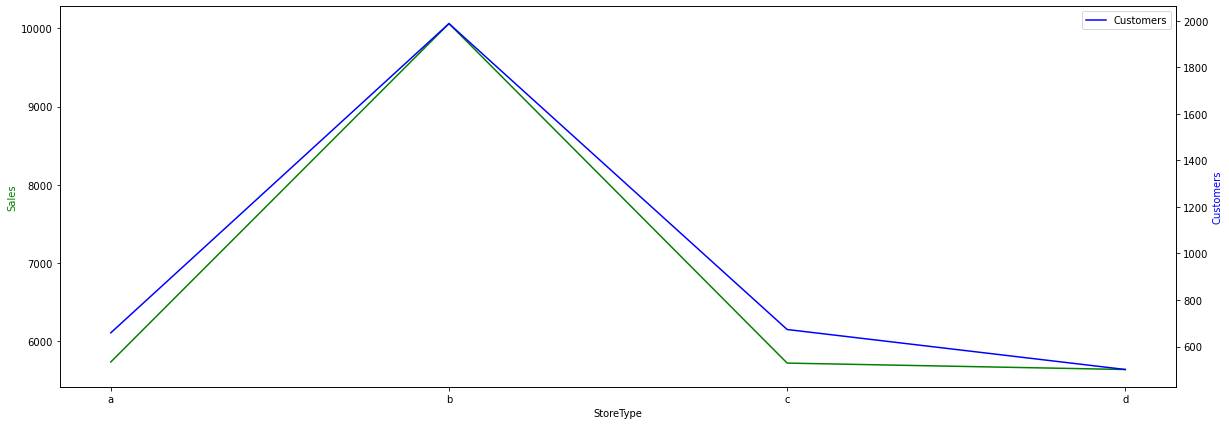

In [137]:
fig, ax1 = plt.subplots(figsize=(20,7))
ax2 = ax1.twinx()
ax1.plot(sales_stype['StoreType'],sales_stype['Sales'], color = 'g', label = 'Sales') 
ax2.plot(sales_cust['StoreType'],sales_cust['Customers'],'b-', label = 'Customers')
ax1.set_xlabel('StoreType')
ax1.set_ylabel('Sales',color = 'g')
ax2.set_ylabel('Customers',color = 'b')
plt.xticks(fontsize=50)
plt.legend()
plt.show()

Text(0, 0.5, 'Sales')

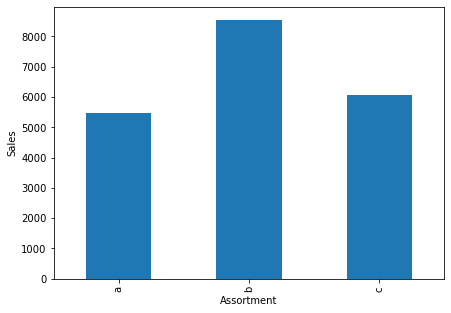

In [130]:
plt.figure(figsize = (7,5))
train_df.groupby('Assortment')['Sales'].mean().plot.bar()
plt.ylabel('Sales')

In [38]:
sales_assor = train_df.groupby('Assortment')['Sales'].mean()
sales_assor =sales_assor.reset_index()
sales_cust_assor = train_df.groupby('Assortment')['Customers'].mean()
sales_cust_assor = sales_cust_assor.reset_index()

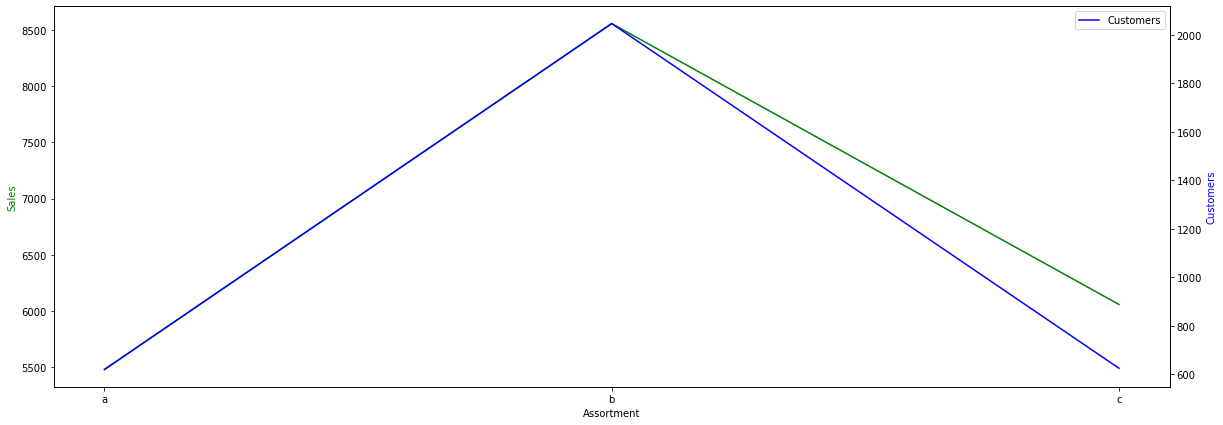

In [39]:
fig, ax1 = plt.subplots(figsize=(20,7))
ax2 = ax1.twinx()
ax1.plot(sales_assor['Assortment'],sales_assor['Sales'], color = 'g', label = 'Sales') 
ax2.plot(sales_cust_assor['Assortment'],sales_cust_assor['Customers'],'b-', label = 'Customers')
ax1.set_xlabel('Assortment')
ax1.set_ylabel('Sales',color = 'g')
ax2.set_ylabel('Customers',color = 'b')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Customers', ylabel='Sales'>

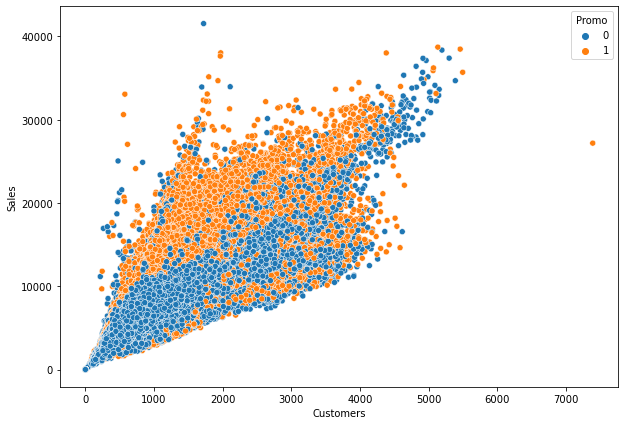

In [149]:
plt.figure(figsize = (10,7))
sns.scatterplot(x=train_df['Customers'], y=train_df['Sales'], hue = train_df['Promo'])

<AxesSubplot:xlabel='CompetitionDistance', ylabel='Sales'>

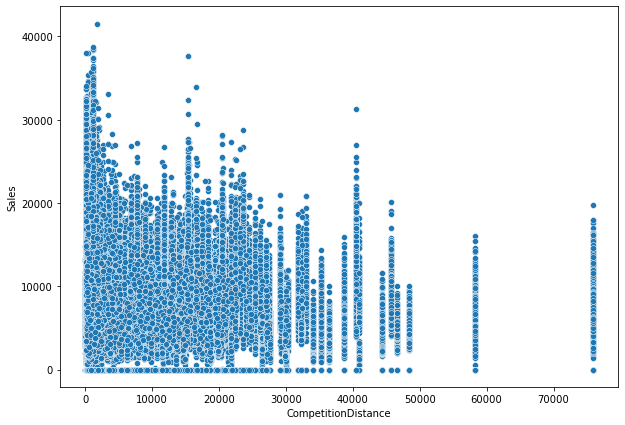

In [158]:
plt.figure(figsize = (10,7))
sns.scatterplot(x=train_df['CompetitionDistance'], y=train_df['Sales'])

In [42]:
train_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,Promo2Open
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,0.0,0.0,0,2015,7,31,31,82.0,0.000000
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0,64.131148


In [43]:
sales_byday = train_df.groupby('Day')['Sales'].mean()
sales_byday = sales_byday.reset_index()
cust_byday = train_df.groupby('Day')['Customers'].mean()
cust_byday = cust_byday.reset_index()

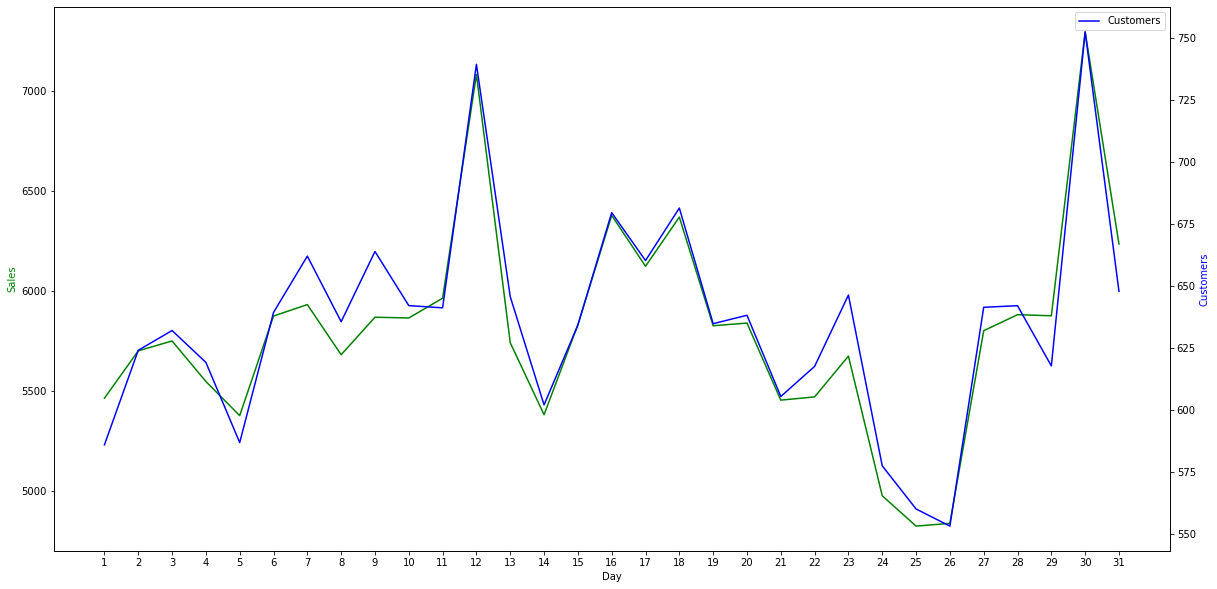

In [152]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()
ax1.plot(sales_byday['Day'],sales_byday['Sales'], color = 'g', label = 'Sales') 
ax2.plot(cust_byday['Day'],cust_byday['Customers'],'b-', label = 'Customers')
ax1.set_xlabel('Day')
ax1.set_ylabel('Sales',color = 'g')
ax2.set_ylabel('Customers',color = 'b')
x = np.arange(1,32,1)
plt.xticks(x)
plt.legend()
plt.show()

<AxesSubplot:xlabel='Date'>

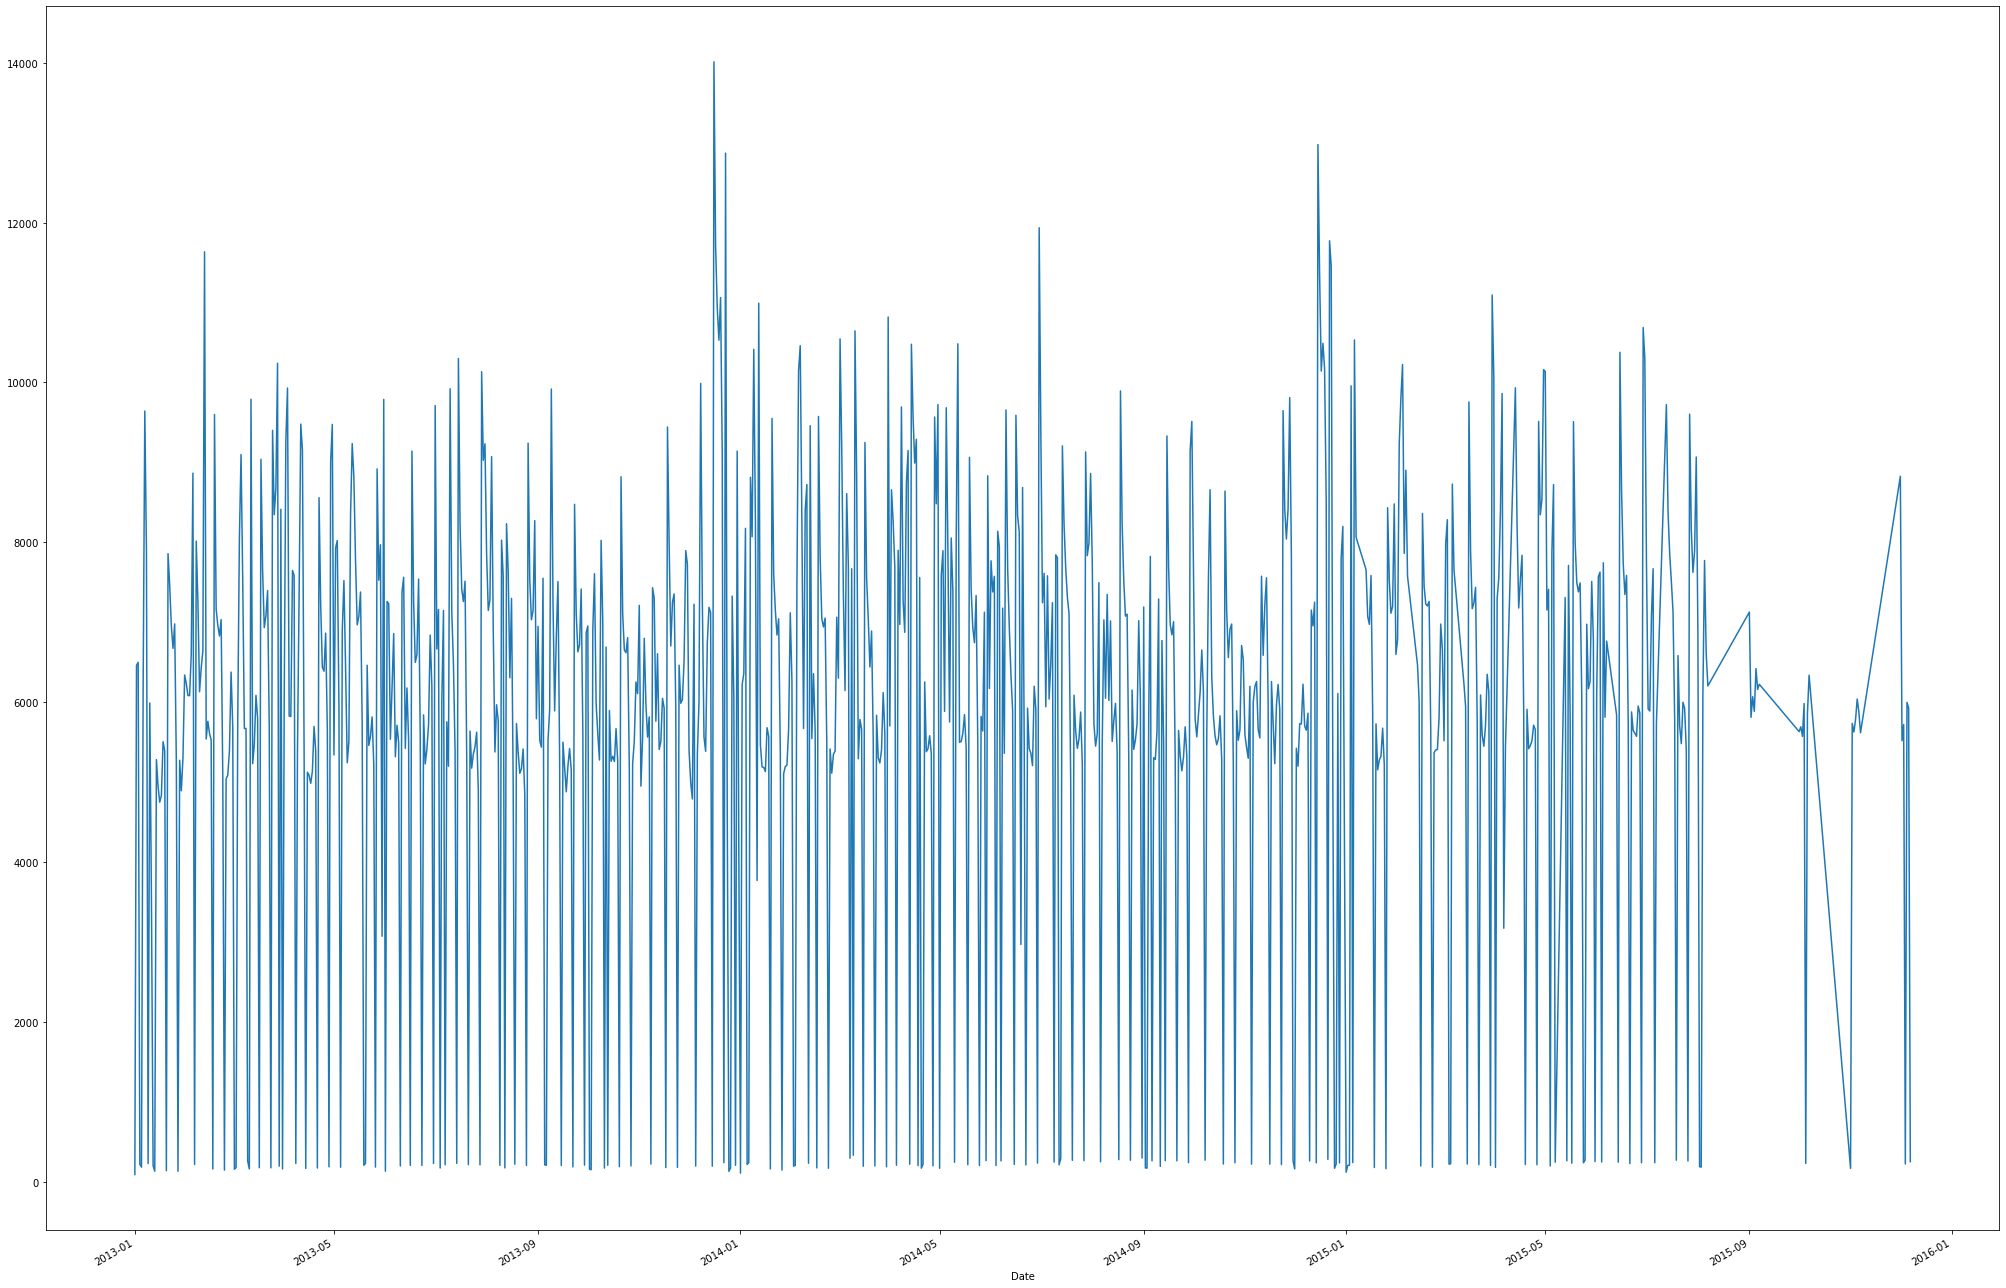

In [168]:

train_df.groupby('Date')['Sales'].mean().plot.line()

In [45]:
sales_bymon = train_df.groupby('Month')['Sales'].mean()
sales_bymon = sales_bymon.reset_index()
cust_bymon = train_df.groupby('Month')['Customers'].mean()
cust_bymon = cust_bymon.reset_index()

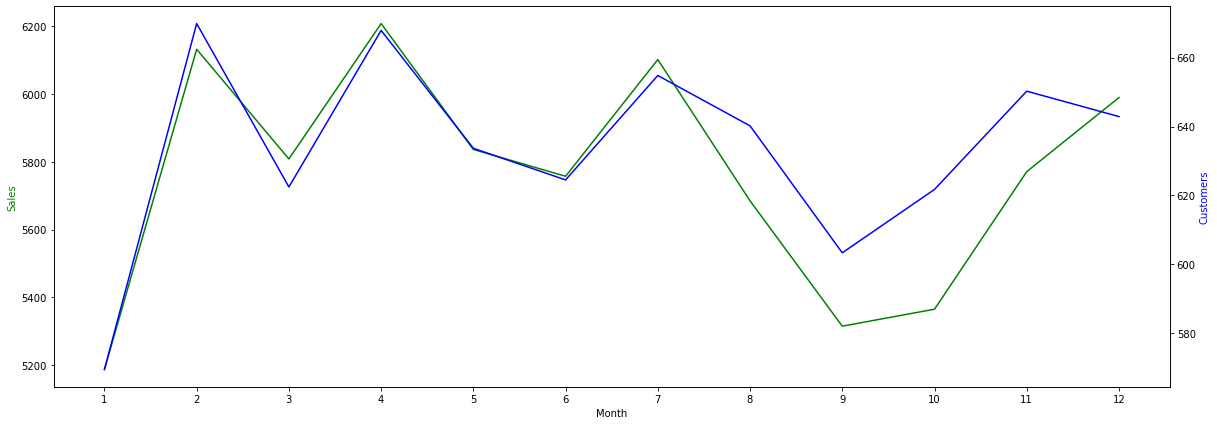

In [157]:
fig, ax1 = plt.subplots(figsize=(20,7))
ax2 = ax1.twinx()
ax1.plot(sales_bymon['Month'],sales_bymon['Sales'], color = 'g', label = 'Sales') 
ax2.plot(cust_bymon['Month'],cust_bymon['Customers'],'b-', label = 'Customers')
ax1.set_xlabel('Month')
ax1.set_ylabel('Sales',color = 'g')
ax2.set_ylabel('Customers',color = 'b')
mon = np.arange(1,13,1)
plt.xticks(mon)
plt.show()

In [188]:
sales_df_2013 = train_df[train_df['Year']== 2013]
sales_df_2014 = train_df[train_df['Year']==2014]
sales_df_2015 = train_df[train_df['Year']== 2015]

In [189]:
#monthly sales
sales_2013 = sales_df_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('Month')['Sales'].sum().reset_index()

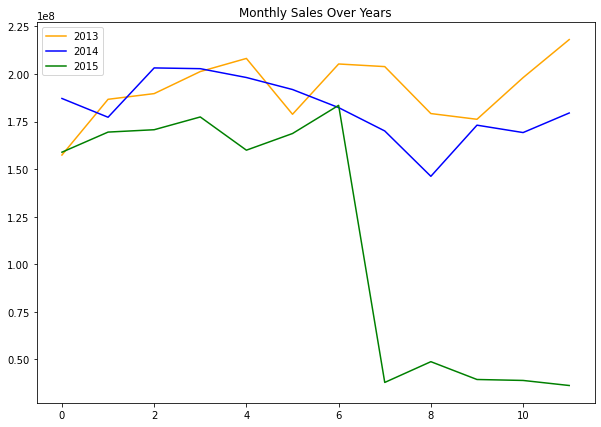

In [191]:
plt.figure(figsize = (10,7))
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()
     

<AxesSubplot:xlabel='StateHoliday'>

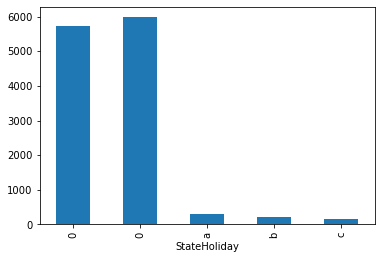

In [47]:
train_df.groupby('StateHoliday')['Sales'].mean().plot.bar()

In [48]:
train_state_c = train_df[train_df['StateHoliday'].isin(['c'])]
train_state_a= train_df[train_df['StateHoliday'].isin(['a'])]
train_state_b = train_df[train_df['StateHoliday'].isin(['b'])]

In [49]:
train_state = pd.concat([train_state_a, train_state_b,train_state_c], ignore_index=True, axis=0)

Text(0, 0.5, 'Sales')

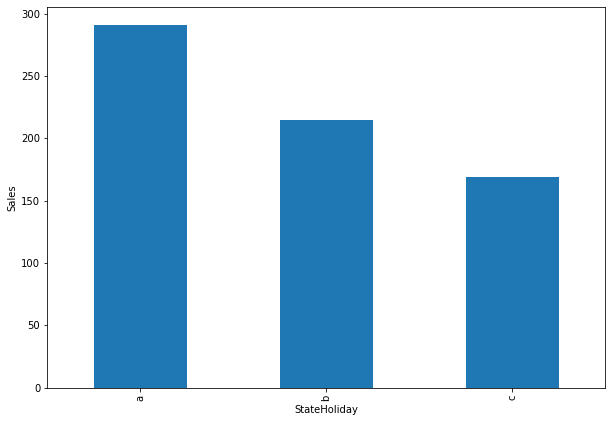

In [160]:
plt.figure(figsize = (10,7))
train_state.groupby('StateHoliday')['Sales'].mean().plot.bar()
plt.ylabel('Sales')

<AxesSubplot:title={'center':'School Holiday and Sales'}, ylabel='Sales'>

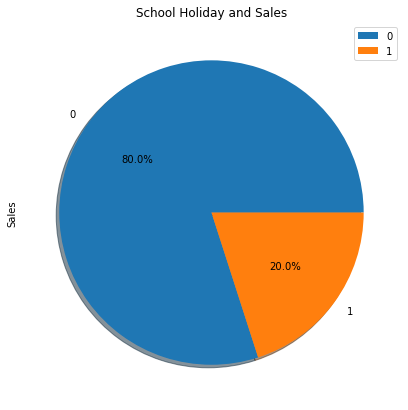

In [183]:
plt.figure(figsize=(10,7))
train_df.groupby("SchoolHoliday")["Sales"].sum().plot.pie(title='School Holiday and Sales', legend=True, autopct='%1.1f%%', shadow=True)

In [52]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,Promo2Open
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,0.0,0.0,0,2015,7,31,31,82.0,0.000000
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0,64.131148
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0,51.901639
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,0,0.0,0.0,0,2015,7,31,31,70.0,0.000000
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,0,0.0,0.0,0,2015,7,31,31,3.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0,0.000000
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,0,0.0,0.0,0,2013,1,1,1,81.0,0.000000
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,0,0.0,0.0,0,2013,1,1,1,0.0,0.000000
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,0,0.0,0.0,0,2013,1,1,1,0.0,0.000000


<ipython-input-53-ccc99ec9aa33>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), cmap="coolwarm", annot=True)


<AxesSubplot:>

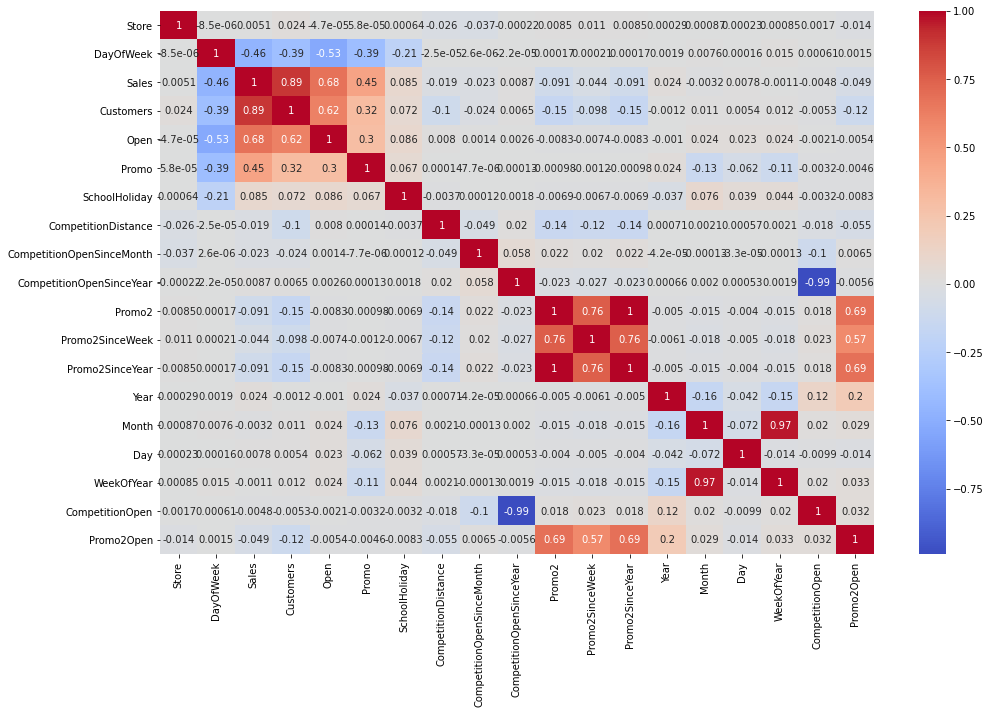

In [53]:
#correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(train_df.corr(), cmap="coolwarm", annot=True)

In [54]:
columns_to_drop = ['Store', 'Year', 'WeekOfYear', 'CompetitionOpen','Promo2Open']

In [55]:
corr_df = train_df.drop(columns = columns_to_drop, axis =1)

<ipython-input-56-c54fd40c8320>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(corr_df.corr(), cmap="coolwarm", annot=True)


<AxesSubplot:>

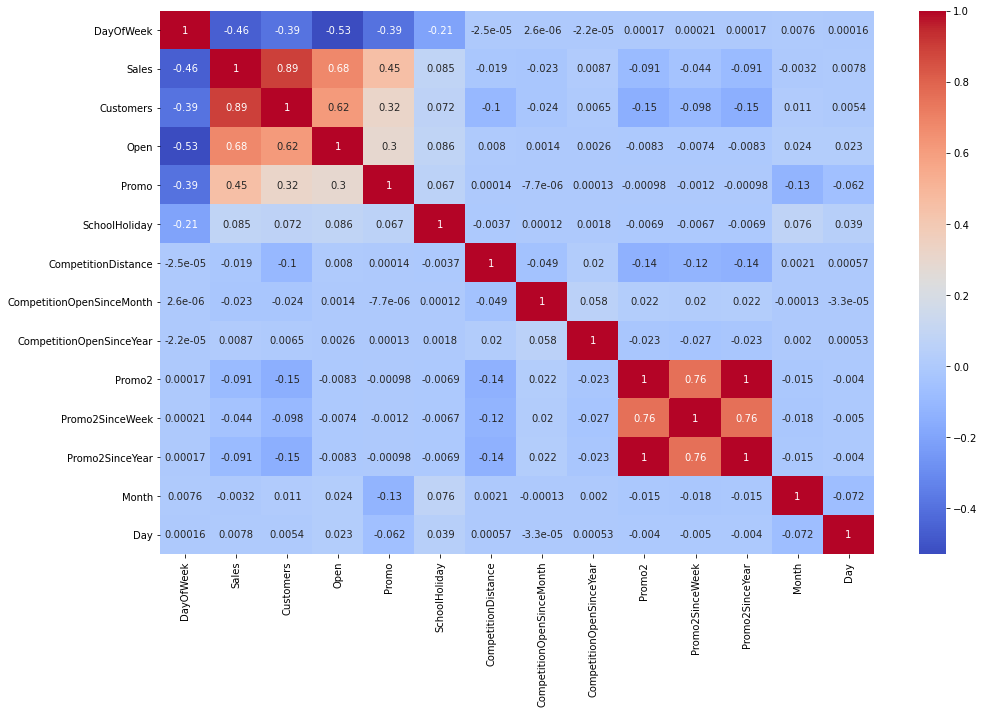

In [56]:
plt.figure(figsize=(16,10))
sns.heatmap(corr_df.corr(), cmap="coolwarm", annot=True)

In [57]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open'],
      dtype='object')

In [58]:
input_cols = ['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open']

target_col = 'Sales'

In [59]:
inputs = train_df[input_cols].copy()
targets = train_df[target_col].copy()

In [60]:
test_inputs = test_df[input_cols].copy()

In [61]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 
              'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open',
              'Day', 'Month', 'Year', 'WeekOfYear' ]
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

In [62]:

inputs[numeric_cols].isna().sum()

Store                  0
Promo                  0
SchoolHoliday          0
CompetitionDistance    0
CompetitionOpen        0
Promo2                 0
Promo2Open             0
Day                    0
Month                  0
Year                   0
WeekOfYear             0
dtype: int64

In [63]:
test_inputs[numeric_cols].isna().sum()

Store                  0
Promo                  0
SchoolHoliday          0
CompetitionDistance    0
CompetitionOpen        0
Promo2                 0
Promo2Open             0
Day                    0
Month                  0
Year                   0
WeekOfYear             0
dtype: int64

Scaling values

In [64]:
inputs['StateHoliday'] = inputs['StateHoliday'].astype(str)
test_inputs['StateHoliday'] = test_inputs['StateHoliday'].astype(str)

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
scaler = StandardScaler().fit(inputs[numeric_cols])

In [103]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [120]:
inputs

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,-1.731640,5,2015-07-31,555,1,1.273237,0,2.144211,c,a,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-1.728534,5,2015-07-31,625,1,1.273237,0,2.144211,a,a,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.725427,5,2015-07-31,821,1,1.273237,0,2.144211,a,a,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.722321,5,2015-07-31,1498,1,1.273237,0,2.144211,c,c,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-1.719214,5,2015-07-31,559,1,1.273237,0,2.144211,a,a,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1.716545,2,2013-01-01,0,0,-0.785400,a,2.144211,a,a,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1017205,1.719651,2,2013-01-01,0,0,-0.785400,a,2.144211,c,c,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1017206,1.722758,2,2013-01-01,0,0,-0.785400,a,2.144211,a,c,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1017207,1.725864,2,2013-01-01,0,0,-0.785400,a,2.144211,a,c,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [104]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))


/Users/samituttarkar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [105]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [122]:

inputs[encoded_cols]

,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1017205,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1017206,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1017207,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [107]:
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [108]:
xgb_model = XGBRegressor(random_state=42, n_jobs= -1, n_estimators= 20, max_depth=4)

In [109]:
%%time
xgb_model.fit(X, targets)

CPU times: user 35.5 s, sys: 2.52 s, total: 38 s
Wall time: 5.45 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=20, n_jobs=-1, num_parallel_tree=None, predictor=None,
             random_state=42, ...)

In [110]:
preds = xgb_model.predict(X)

In [111]:
from sklearn.metrics import mean_squared_error
# Let us define a function to get rmse score
def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [112]:
rmse(preds, targets)

2248.7193328988865

In [113]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 35,25

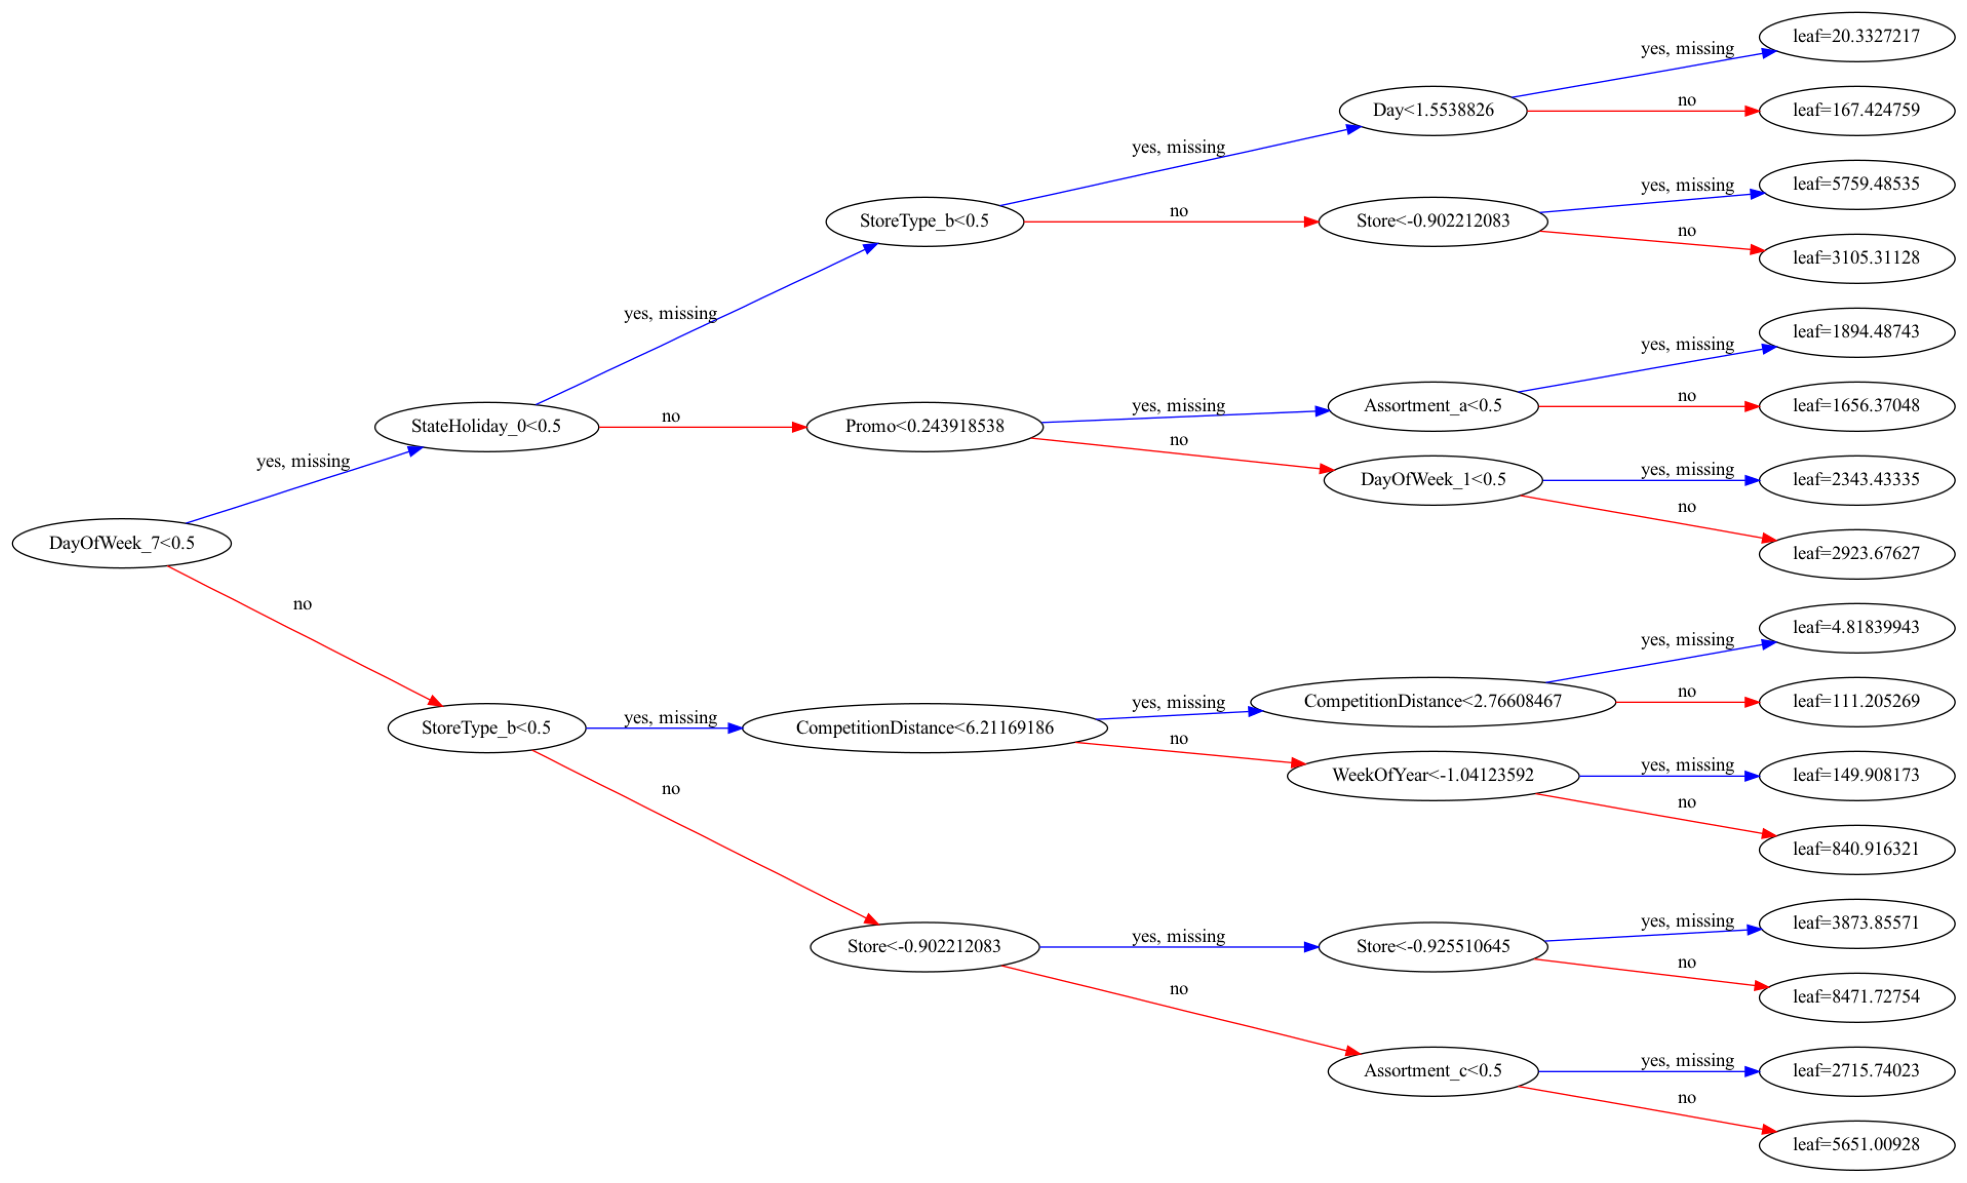

In [161]:
plot_tree(xgb_model, rankdir= 'LR');

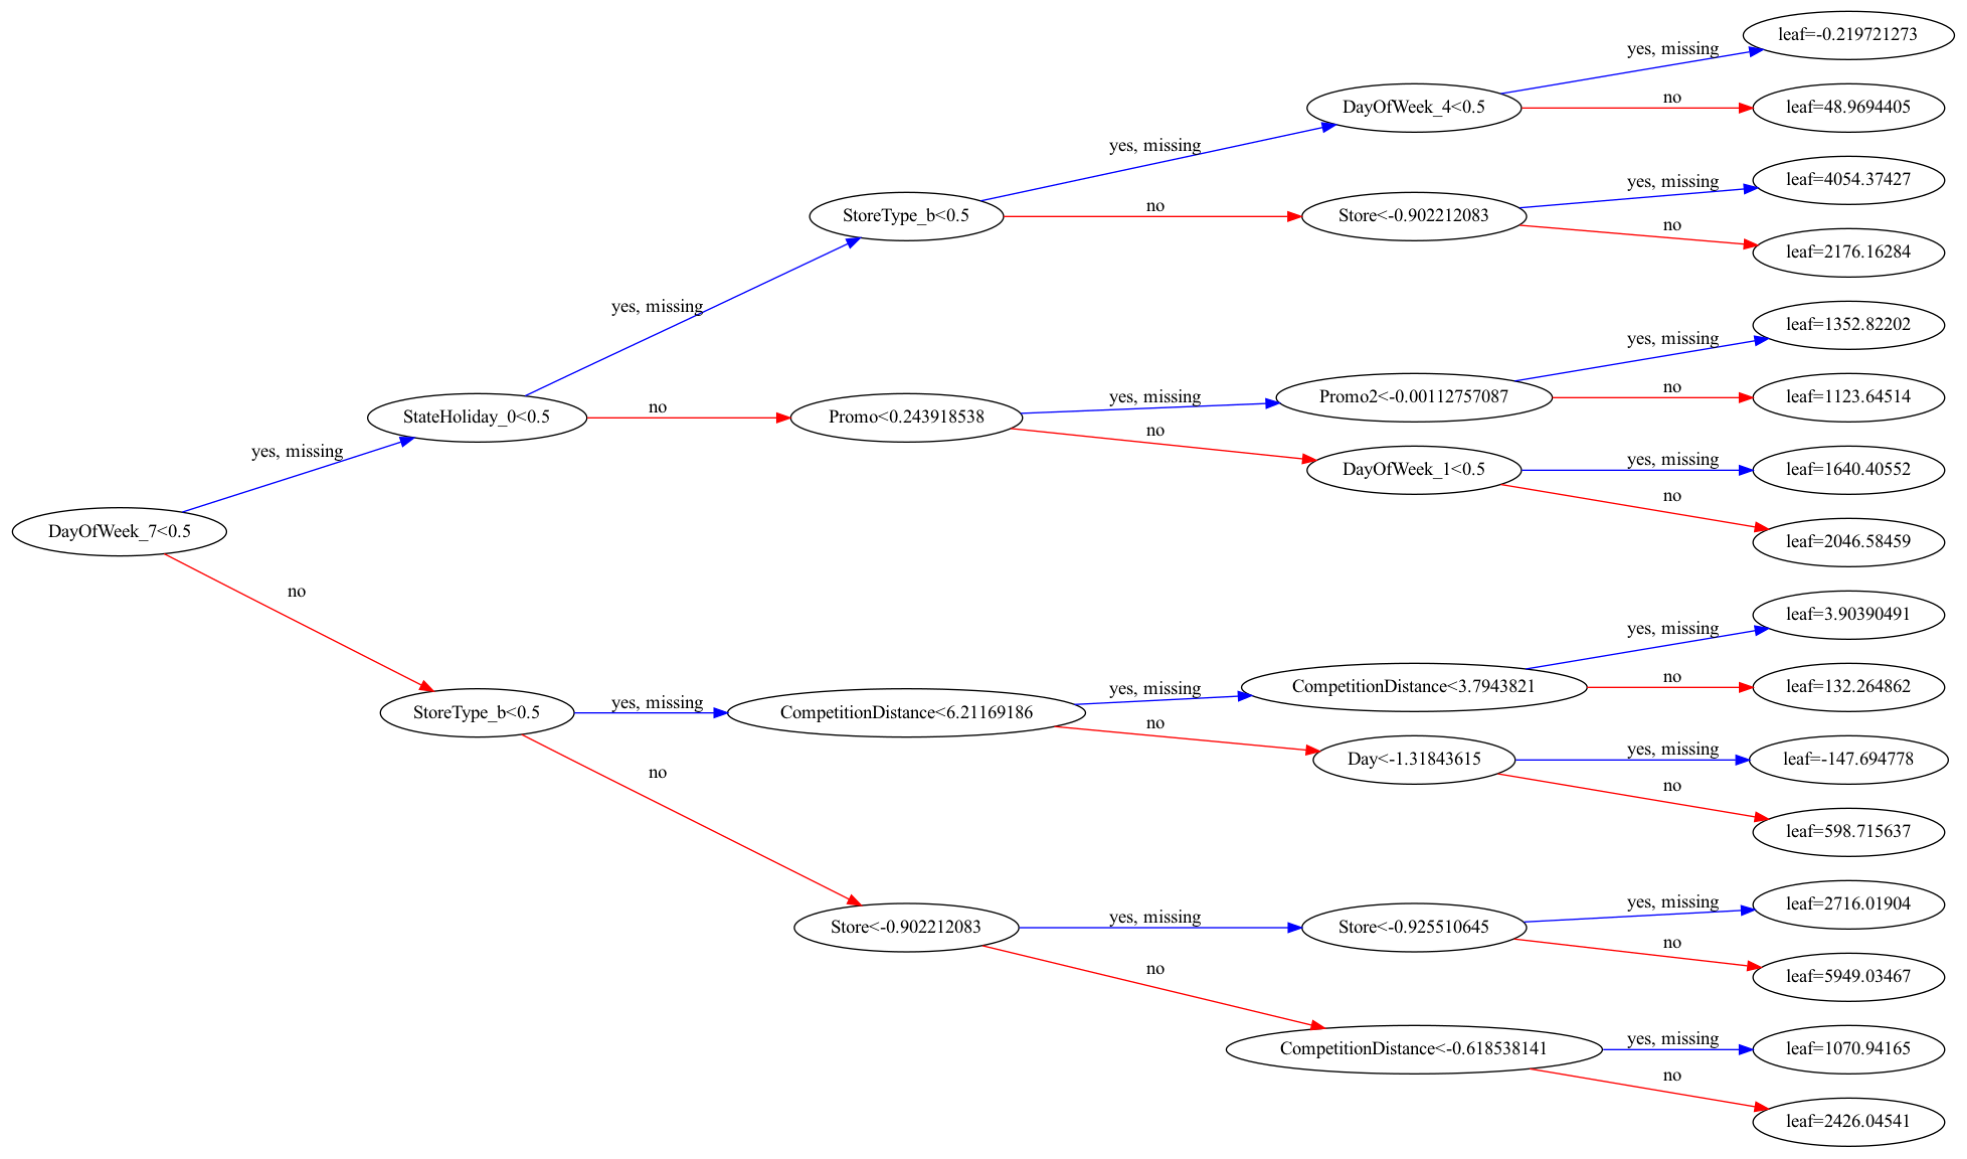

In [115]:
plot_tree(xgb_model, rankdir='LR', num_trees=1);

In [116]:
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

In [117]:

feature_importance_df.head(10)

,feature,importance
17,DayOfWeek_7,0.363675
18,StateHoliday_0,0.169366
1,Promo,0.149207
11,DayOfWeek_1,0.055539
25,StoreType_d,0.037921
23,StoreType_b,0.036725
5,Promo2,0.035924
26,Assortment_a,0.028885
10,WeekOfYear,0.024089
15,DayOfWeek_5,0.015503


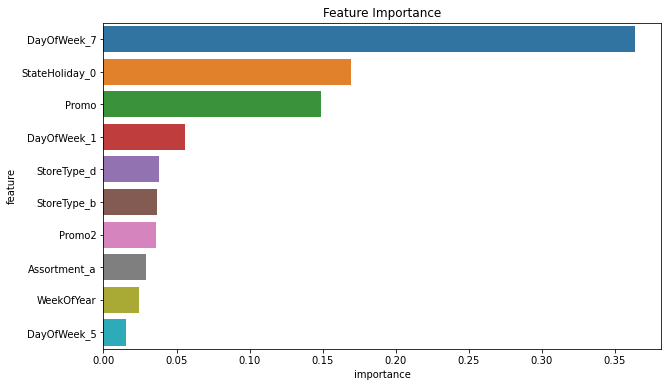

In [118]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=feature_importance_df.head(10), x='importance', y='feature');

In [166]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)

In [167]:
model.fit(X, targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [169]:
train_preds = model.predict(X)

In [170]:
rmse(train_preds, targets)

411.31944167015166

In [171]:
test_preds = model.predict(X_test)

In [172]:
test_preds

array([ 4541.7754,  7575.7266,  8912.044 , ...,  5340.078 , 22462.158 ,
        5671.5415], dtype=float32)

In [175]:
test_df['Sales']  = test_preds

<AxesSubplot:xlabel='Date', ylabel='Sales'>

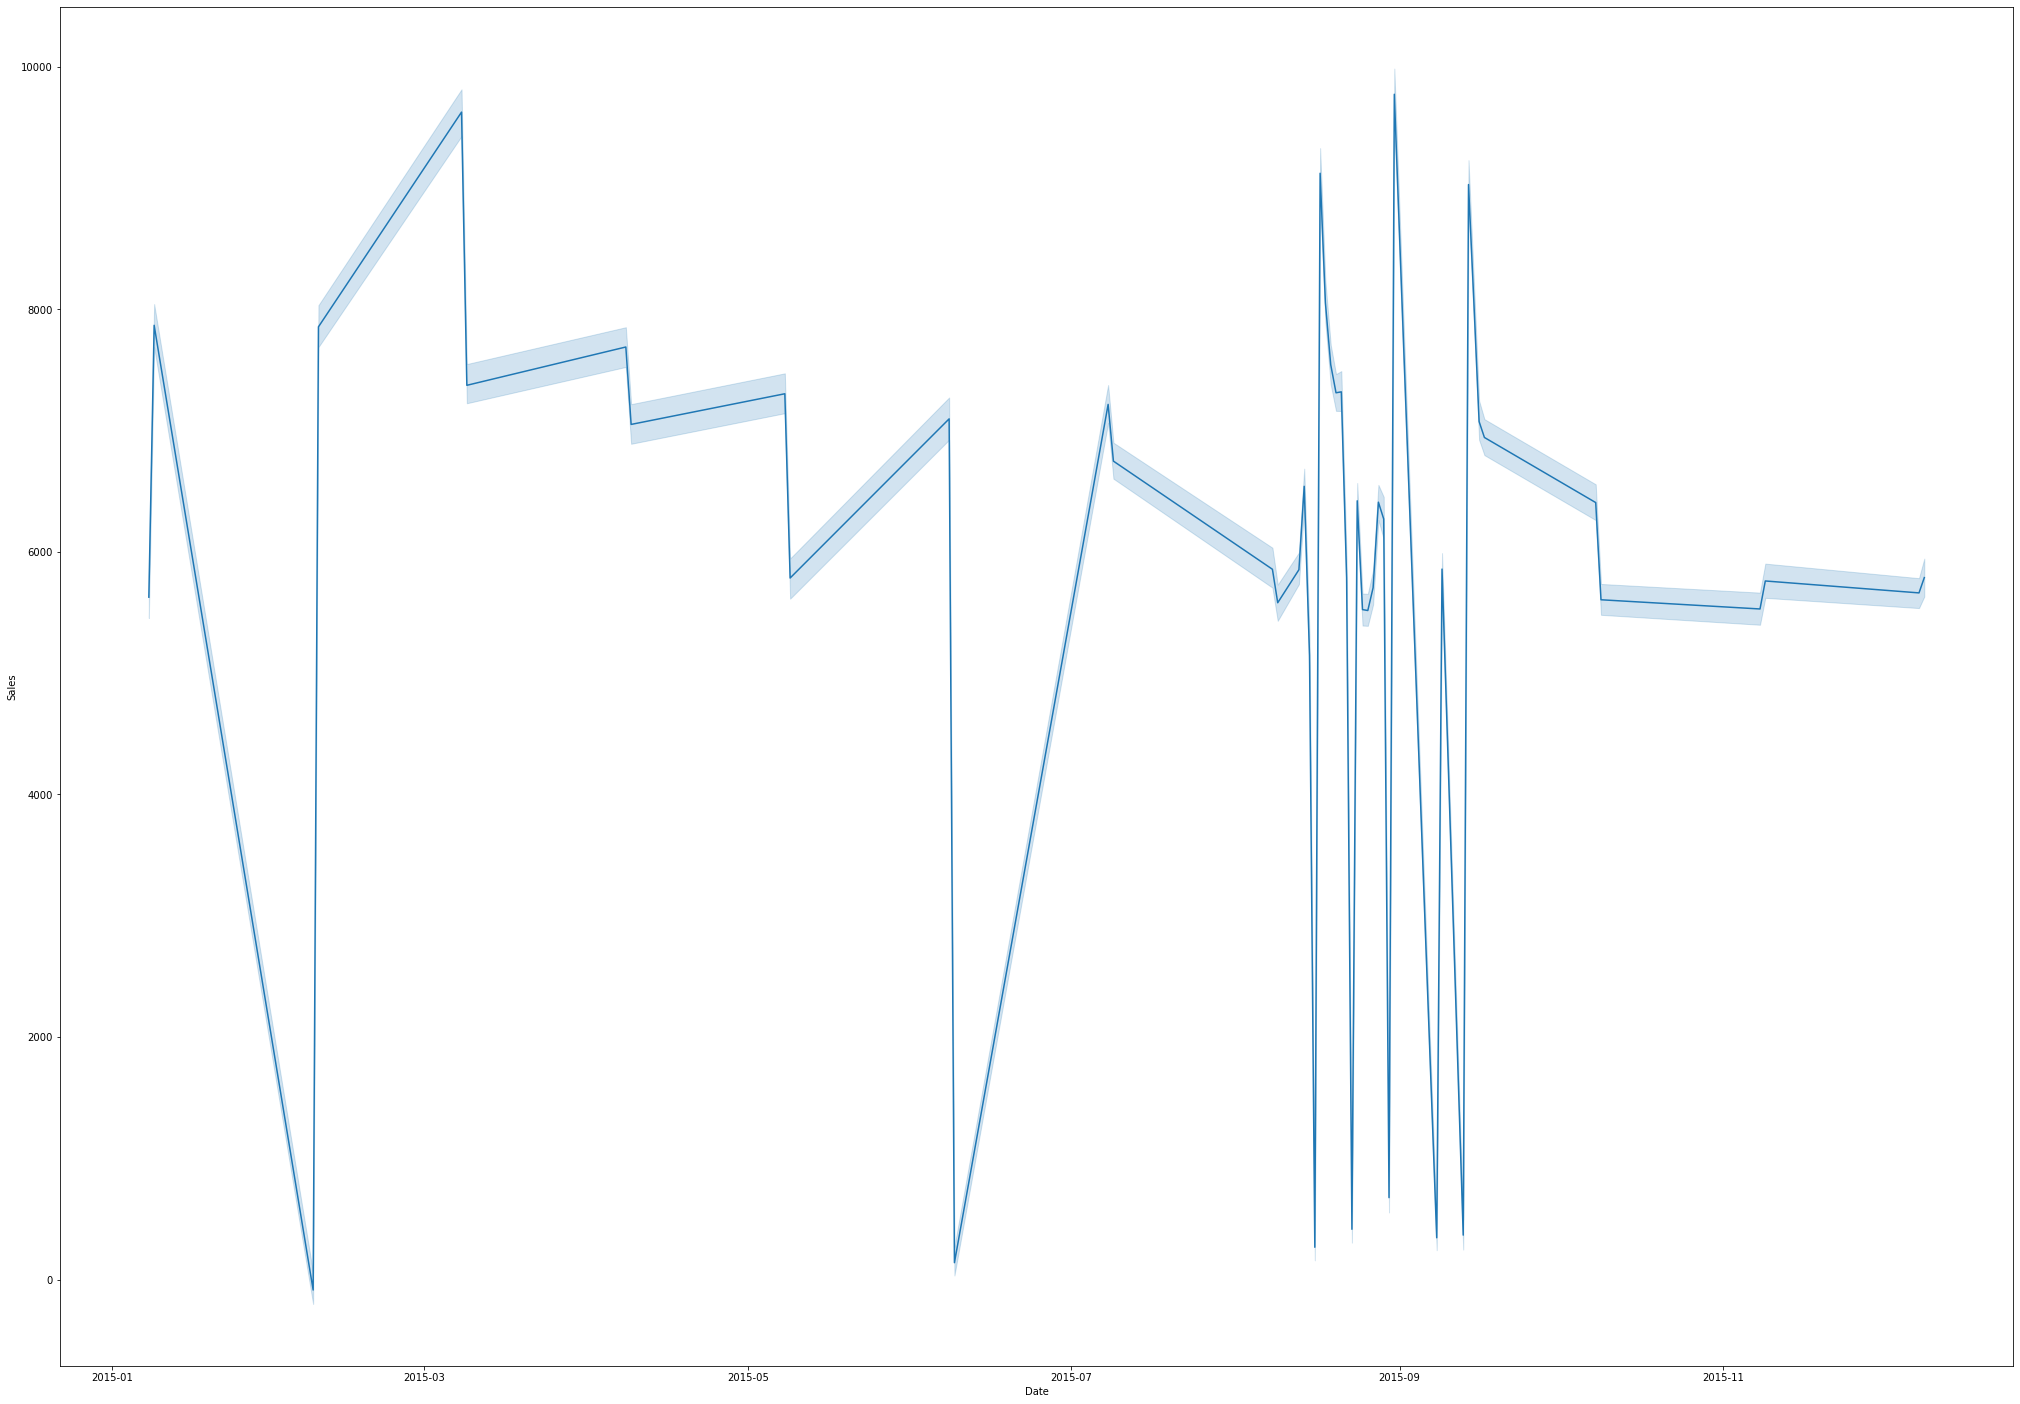

In [179]:
sns.lineplot(data = test_df, x = test_df['Date'],y = test_df['Sales'])

/Users/samituttarkar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

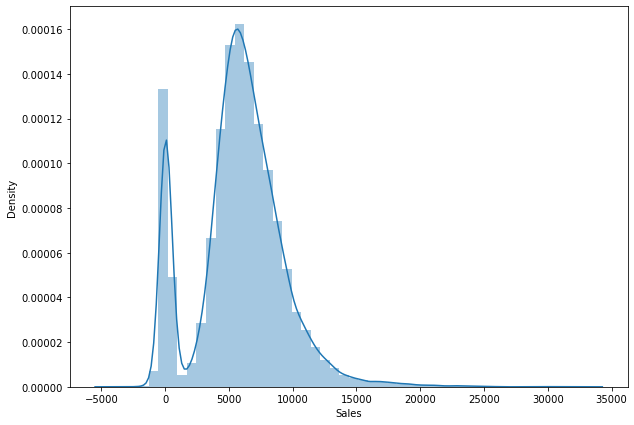

In [181]:
plt.figure(figsize = (10,7))
sns.distplot(test_df['Sales'])